# Objectives of the project:-
    1. Explore and visualize the dataset.
    2. Build a classification model to predict if the customer is going to churn or not
    3. Optimize the model using appropriate techniques
    4. Generate a set of insights and recommendations that will help the bank

Data Dictionary
* CLIENTNUM: Client number. Unique identifier for the customer holding the account 
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [1]:
# Calculating the time for entire project execution
import time
start_time = time.time()

# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

from xgboost import XGBClassifier

import lightgbm as lgb

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay, # plot_roc_curve is depreciated
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# # Printing style
from tabulate import tabulate

# # To supress warnings
import warnings

# # date time
from datetime import datetime

warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
churner = pd.read_csv("BankChurners.csv")
# Checking the number of rows and columns in the data
churner.shape

(10127, 23)

In [3]:
additional_droppable_columns = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

for col in additional_droppable_columns:
    if col in churner.columns.unique().tolist():
        churner.drop(columns=[col], inplace=True)

In [4]:
# Creating a copy dataset for analysis
data = churner.copy()

In [5]:
# let's view the first 5 rows of the data
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [6]:
# let's view the last 5 rows of the data
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In [7]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are a total of 21 columns and 10,127 observations in the dataset
* 10,127 non-null values i.e. columns have no missing values.

In [8]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

In [9]:
# let's check for missing values in the data
df_null_summary = pd.concat([data.isnull().sum(), data.isnull().sum() * 100 / data.isnull().count()], axis=1)
df_null_summary.columns = ["Null Record Count", "Percentage of Null Records"]
df_null_summary[df_null_summary["Null Record Count"] > 0].sort_values(by="Percentage of Null Records", ascending=False).style.background_gradient(cmap="YlOrRd")

* No missing values

In [10]:
# Unique values for Category columns
data.select_dtypes(include="object").nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [11]:
# Unique values for Numerical Columns
data.select_dtypes(exclude="object").nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

* Age has only 45 unique values i.e. most of the customers are of similar age

In [12]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

* Mean value for the Customer Age column is approx 46 and the median is also 46. This shows that majority of the customers are under 46 years of age.
* Dependent Count column has mean and median of ~2
* Months on Book column has mean and median of 36 months. Minimum value is 13 months, showing that the dataset captures data for customers with the bank at least 1 whole years
* Total Relationship Count has mean and median of ~4
* Credit Limit has a wide range of 1.4K to 34.5K, the median being 4.5K, way less than the mean 8.6K
* Total Transaction Count has mean of ~65 and median of 67

In [13]:
# let's view the statistical summary of the categorical columns in the data
data.describe(include="object").T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

In [14]:
# Below function prints unique value counts and percentages for the category/object type variables
def category_unique_value():
    for cat_cols in (
        data.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                data[cat_cols].value_counts(),
                data[cat_cols].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

In [15]:
category_unique_value()

Unique values and corresponding data counts for feature: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Attrition_Flag                      
Existing Customer   8500      83.934
Attrited Customer   1627      16.066
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
        Count  Percentage
Gender                   
F        5358      52.908
M        4769      47.092
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Education_Level
------------------------------------------------------------------------------------------
                 Count  Percentage
Education_Level                   
Graduate      

* The target variable Attrition Flag has Existing to Attrited ratio of 83.9 : 16.1. There is imbalance in the dataset
* ~93% customers are having Blue Card
* Income Category and Marital Status have unknown values
* Income Category has a value abc for 10% records, which we'll change to Unknown

# Pre-EDA data processing

In [16]:
# Dropping ID coulumn
data.drop(columns=["CLIENTNUM"], inplace=True)

Treating missing values in Education Level and Marital Status.

Note : The missing value treatment should be done after splitting the data into Train, Validation and Test sets. However, in this case, the treatment is generic, since we are filling in the data with Unknown. Thus, the treatment can be done on the overall dataset. Similar strategy is applicable for treating the Income Category column value abc

In [17]:
data["Education_Level"] = data["Education_Level"].fillna("Unknown")
data["Marital_Status"] = data["Marital_Status"].fillna("Unknown")

In [18]:
# Treating Income Category = abc
data.loc[data[data["Income_Category"] == "abc"].index, "Income_Category"] = "Unknown"

In [19]:
# Checking operation outcome
category_unique_value()

Unique values and corresponding data counts for feature: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Attrition_Flag                      
Existing Customer   8500      83.934
Attrited Customer   1627      16.066
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
        Count  Percentage
Gender                   
F        5358      52.908
M        4769      47.092
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Education_Level
------------------------------------------------------------------------------------------
                 Count  Percentage
Education_Level                   
Graduate      

# Data type conversions

In [20]:
# Converting the data type of the category variables from object/float to category
category_columns = data.select_dtypes(include="object").columns.tolist()
data[category_columns] = data[category_columns].astype("category")

# Standardizing column names

In [21]:
# Removing the spaces from column names, and standardizing the column names to lower case
data.columns = [i.replace(" ", "_").lower() for i in data.columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  category
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  category
 3   dependent_count           10127 non-null  int64   
 4   education_level           10127 non-null  category
 5   marital_status            10127 non-null  category
 6   income_category           10127 non-null  category
 7   card_category             10127 non-null  category
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

# Exploratory Data Analysis

Univariate Analysis

Numerical Feature Summary

The first step of univariate analysis is to check the distribution/spread of the data. This is done using primarily histograms and box plots. Additionally we'll plot each numerical feature on violin plot and cumulative density distribution plot. For these 4 kind of plots, we are building below summary() function to plot each of the numerical attributes. Also, we'll display feature-wise 5 point summary.

In [22]:
def summary(data: pd.DataFrame, x: str):
    """
    The function prints the 5 point summary and histogram, box plot,
    violin plot, and cumulative density distribution plots for each
    feature name passed as the argument.

    Parameters:
    ----------

    x: str, feature name

    Usage:
    ------------

    summary('age')
    """
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)

    dict = {"Min": x_min, "Q1": Q1, "Q2": Q2, "Q3": Q3, "Max": x_max}
    df = pd.DataFrame(data=dict, index=["Value"])
    print(f"5 Point Summary of {x.capitalize()} Attribute:\n")
    print(tabulate(df, headers="keys", tablefmt="psql"))

    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace=0.6)
    sns.set_palette("Pastel1")

    plt.subplot(221, frameon=True)
    ax1 = sns.distplot(data[x], color="purple")
    ax1.axvline(np.mean(data[x]), color="purple", linestyle="--")  # Add mean to the histogram
    ax1.axvline(np.median(data[x]), color="black", linestyle="-")  # Add median to the histogram
    plt.title(f"{x.capitalize()} Density Distribution")

    plt.subplot(222, frameon=True)
    ax2 = sns.violinplot(x=data[x], palette="Accent", split=True)
    plt.title(f"{x.capitalize()} Violinplot")

    plt.subplot(223, frameon=True, sharex=ax1)
    ax3 = sns.boxplot(x=data[x], palette="cool", width=0.7, linewidth=0.6, showmeans=True)
    plt.title(f"{x.capitalize()} Boxplot")

    plt.subplot(224, frameon=True, sharex=ax2)
    ax4 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f"{x.capitalize()} Cumulative Density Distribution")

    plt.show()

5 Point Summary of Customer_age Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    26 |   41 |   46 |   52 |    73 |
+-------+-------+------+------+------+-------+


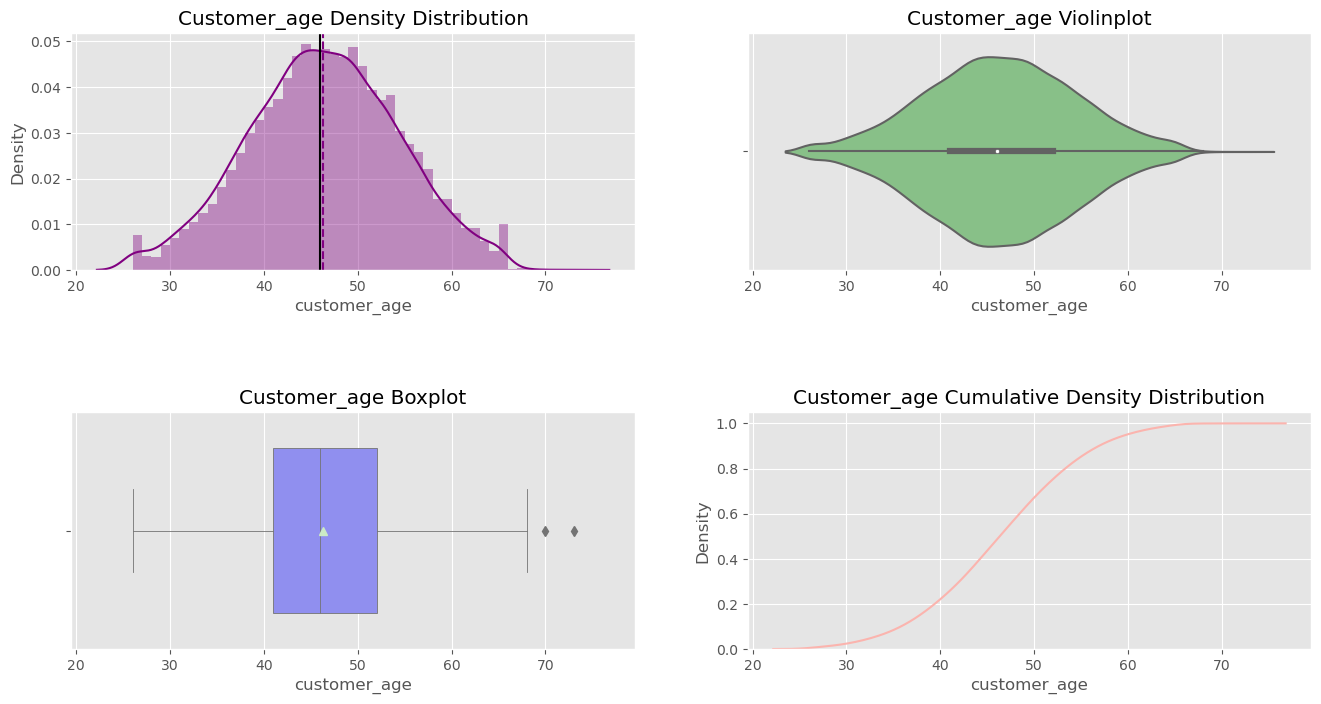

In [23]:
summary(data, "customer_age")

The data is normally distributed, with only 2 outliers on the right side (higher end)

5 Point Summary of Dependent_count Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    1 |    2 |    3 |     5 |
+-------+-------+------+------+------+-------+


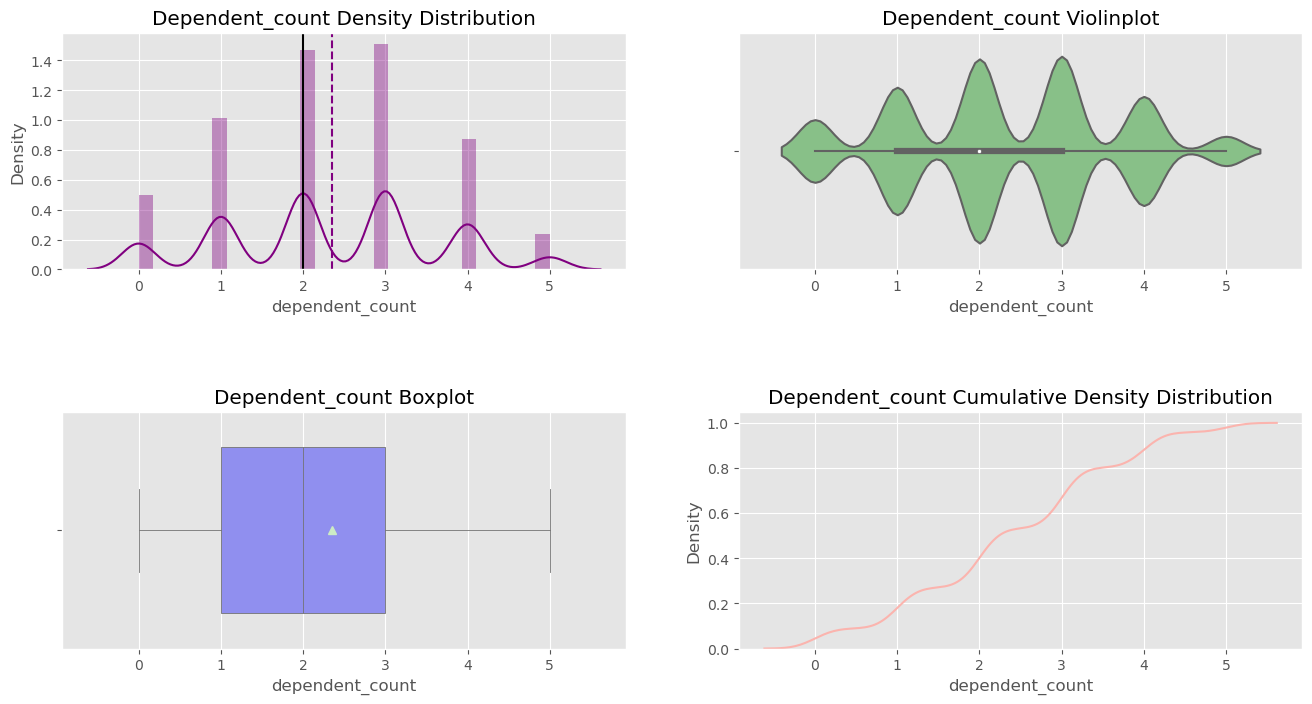

In [24]:
summary(data, "dependent_count")

Dependent Count is mostly 2 or 3

5 Point Summary of Months_on_book Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    13 |   31 |   36 |   40 |    56 |
+-------+-------+------+------+------+-------+


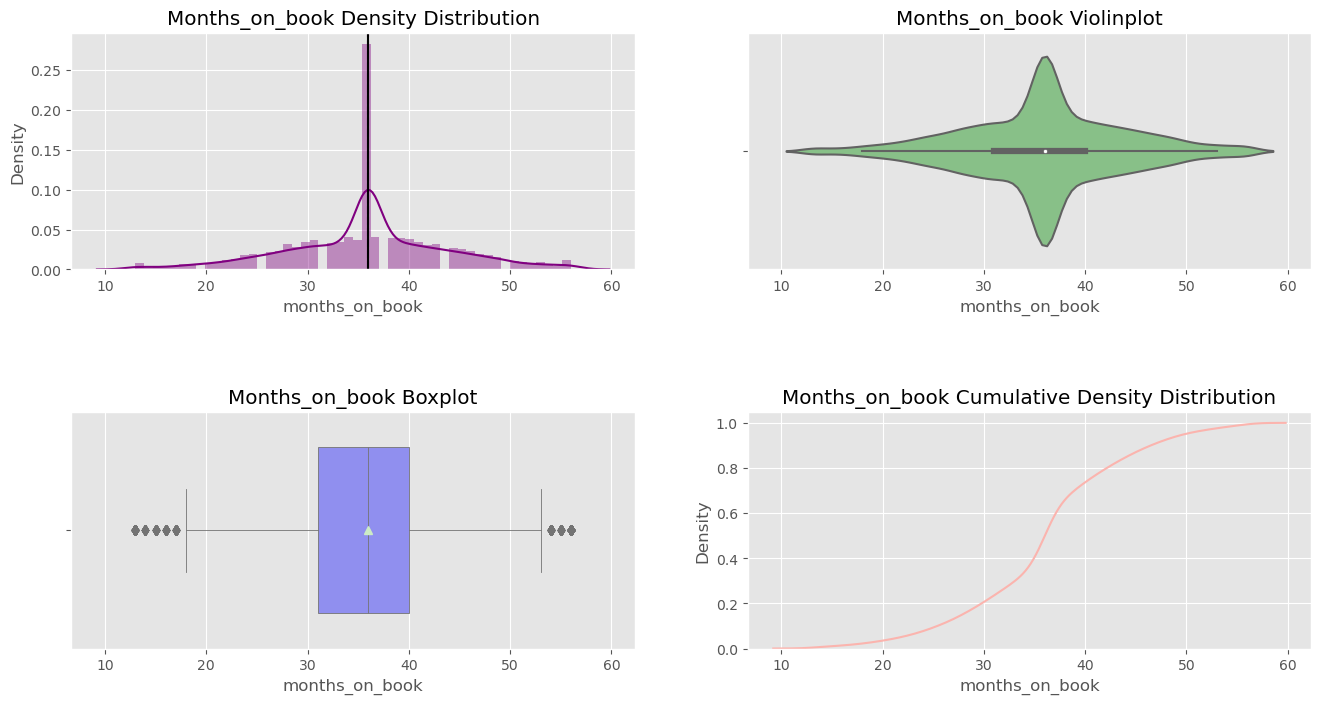

In [25]:
summary(data, "months_on_book")

* Most customers are on the books for 3 years
* There are outliers on both lower and higher end

5 Point Summary of Total_relationship_count Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 |    3 |    4 |    5 |     6 |
+-------+-------+------+------+------+-------+


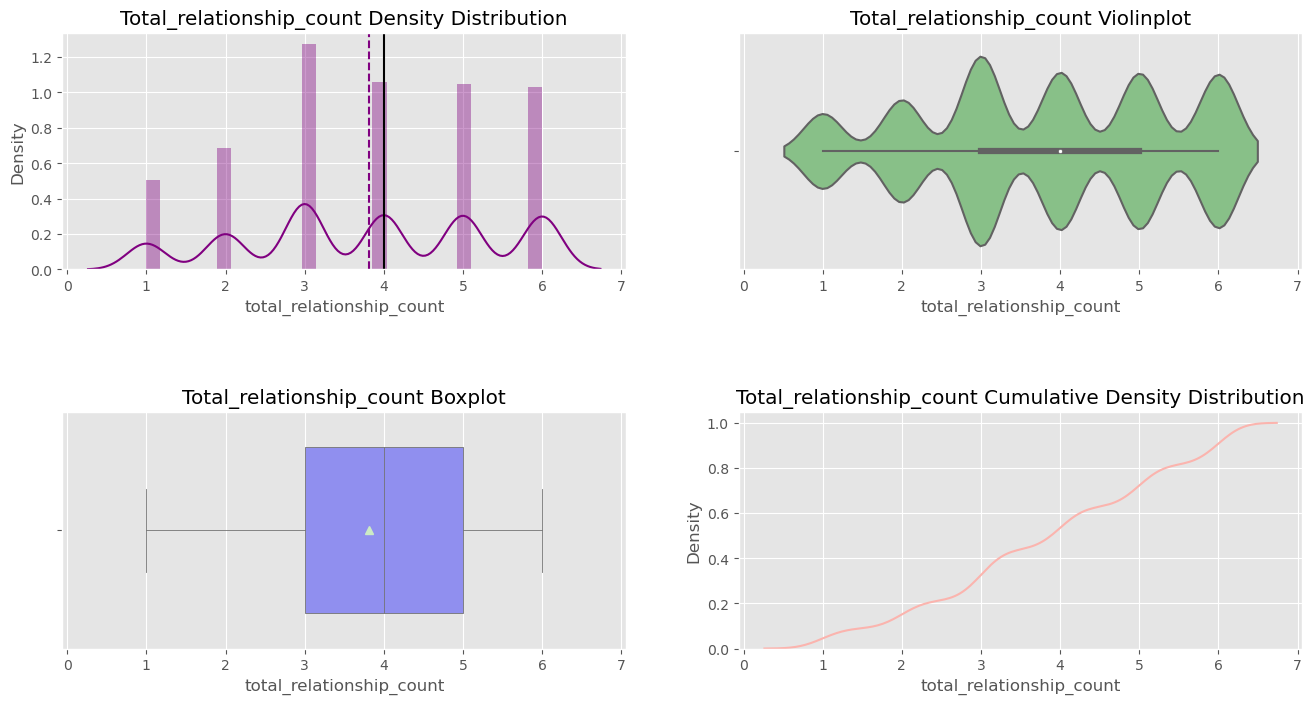

In [26]:
summary(data, "total_relationship_count")

Most of the customers have 4 or more relations with the bank

5 Point Summary of Months_inactive_12_mon Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    2 |    2 |    3 |     6 |
+-------+-------+------+------+------+-------+


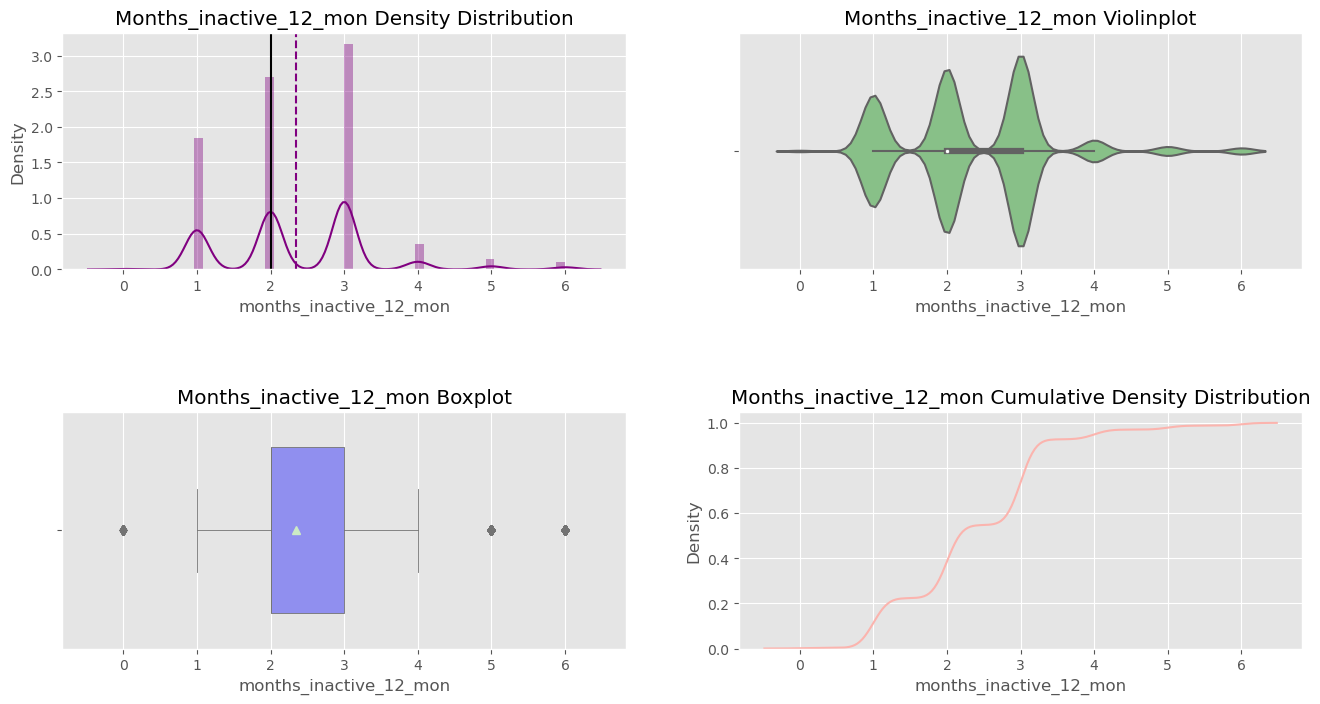

In [27]:
summary(data, "months_inactive_12_mon")

* There are lower and higher end outliers for Months inactive in last 12 months
* Lower end outliers are not concerning since 0 value means the customer is always active. The customers who are inactive for 5 or more months are to be concerned about.

5 Point Summary of Contacts_count_12_mon Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    2 |    2 |    3 |     6 |
+-------+-------+------+------+------+-------+


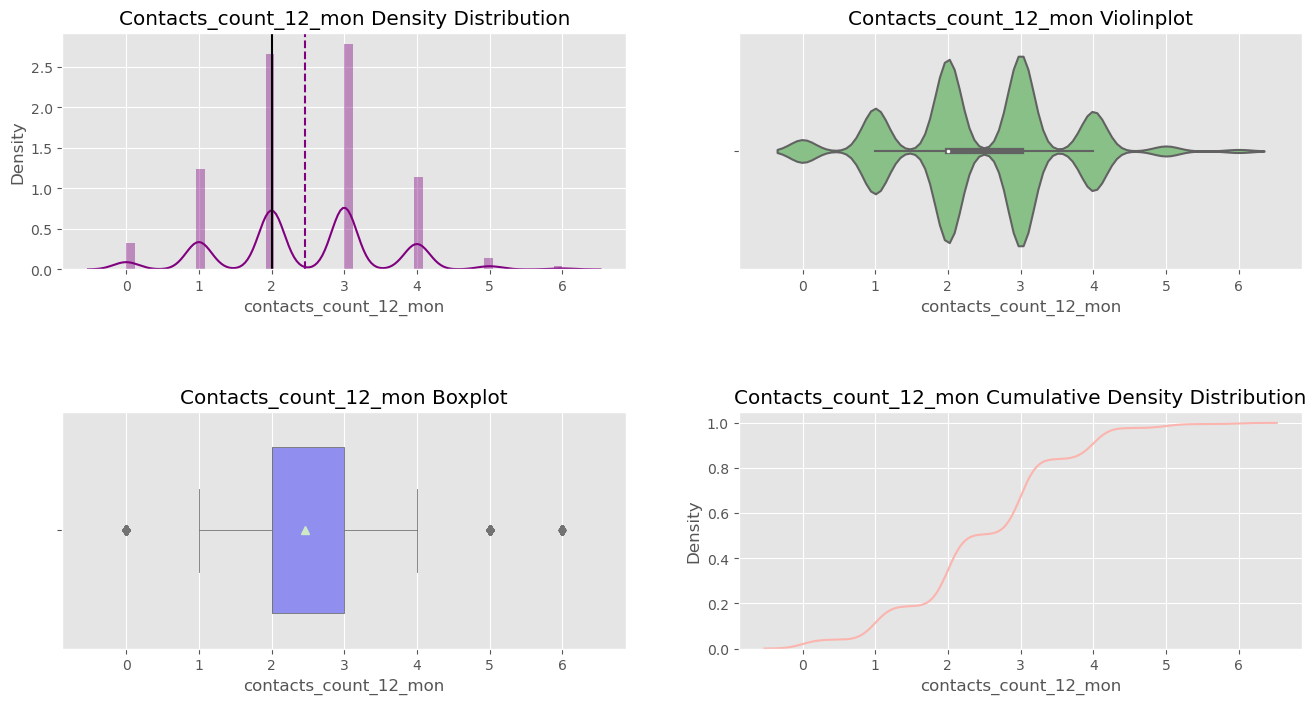

In [28]:
summary(data, "contacts_count_12_mon")

* Again lower and higher end outliers are noticed.
* Here less number of contacts between the bank and the customer should be interesting to be checked

5 Point Summary of Credit_limit Attribute:

+-------+--------+------+------+---------+-------+
|       |    Min |   Q1 |   Q2 |      Q3 |   Max |
|-------+--------+------+------+---------+-------|
| Value | 1438.3 | 2555 | 4549 | 11067.5 | 34516 |
+-------+--------+------+------+---------+-------+


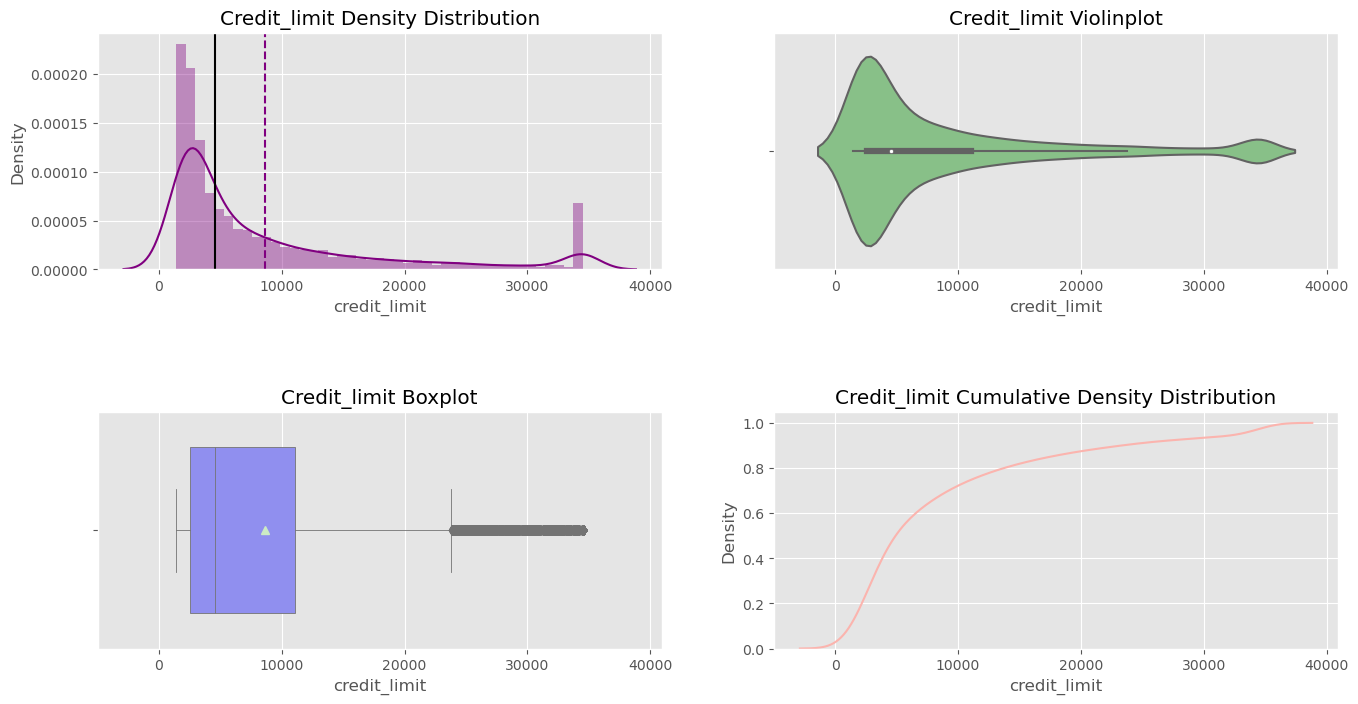

In [29]:
summary(data, "credit_limit")

There are higher end outliers in Credit Limit. This might be because the customers are high end.

In [30]:
data[data["credit_limit"] > 23000]["income_category"].value_counts(normalize=True)

income_category
$80K - $120K     0.421
$120K +          0.302
$60K - $80K      0.156
Unknown          0.110
$40K - $60K      0.012
Less than $40K   0.000
Name: proportion, dtype: float64

In [31]:
data[data["credit_limit"] > 23000]["card_category"].value_counts(normalize=True)

card_category
Blue       0.592
Silver     0.310
Gold       0.083
Platinum   0.015
Name: proportion, dtype: float64

The customers with credit limit more than 23K have ~87% people earning $60K or more, and 90% have Blue or Silver card

5 Point Summary of Total_revolving_bal Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |  359 | 1276 | 1784 |  2517 |
+-------+-------+------+------+------+-------+


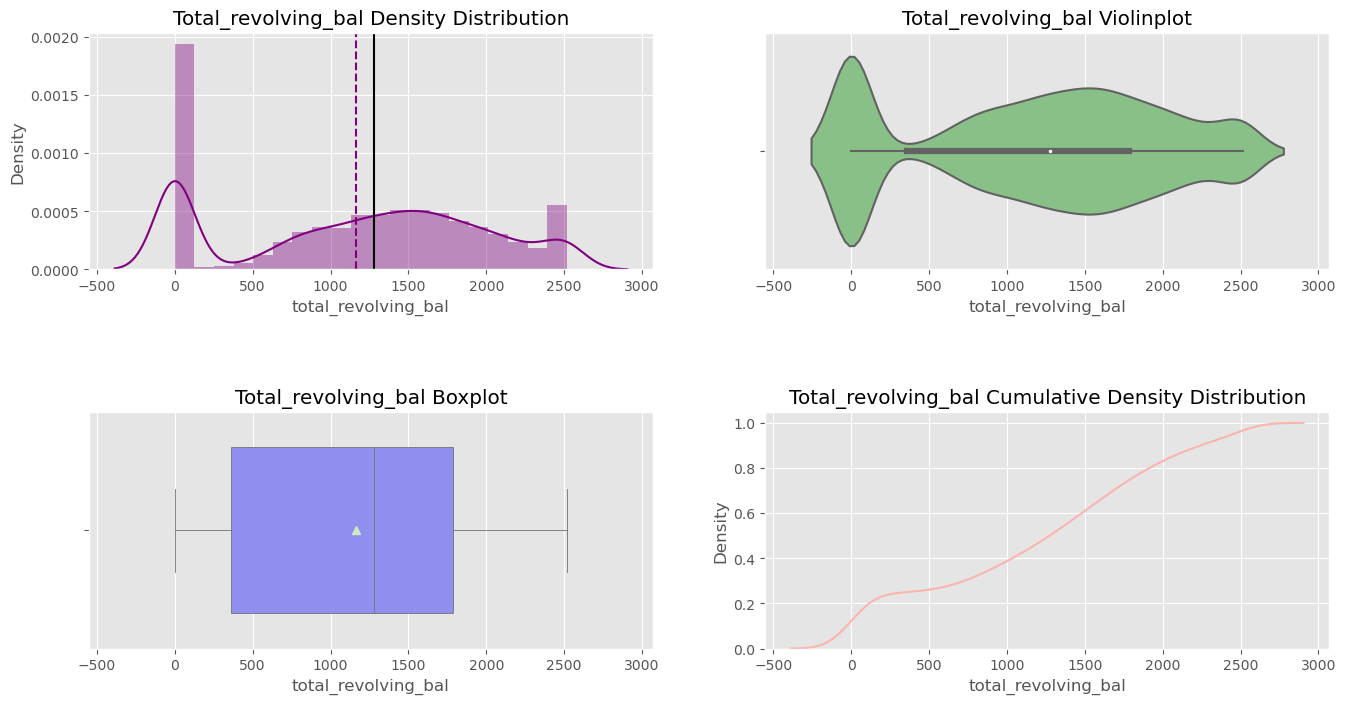

In [32]:
summary(data, "total_revolving_bal")

Total revolving balance of 0 would mean the customer never uses the credit card

5 Point Summary of Avg_open_to_buy Attribute:

+-------+-------+--------+------+------+-------+
|       |   Min |     Q1 |   Q2 |   Q3 |   Max |
|-------+-------+--------+------+------+-------|
| Value |     3 | 1324.5 | 3474 | 9859 | 34516 |
+-------+-------+--------+------+------+-------+


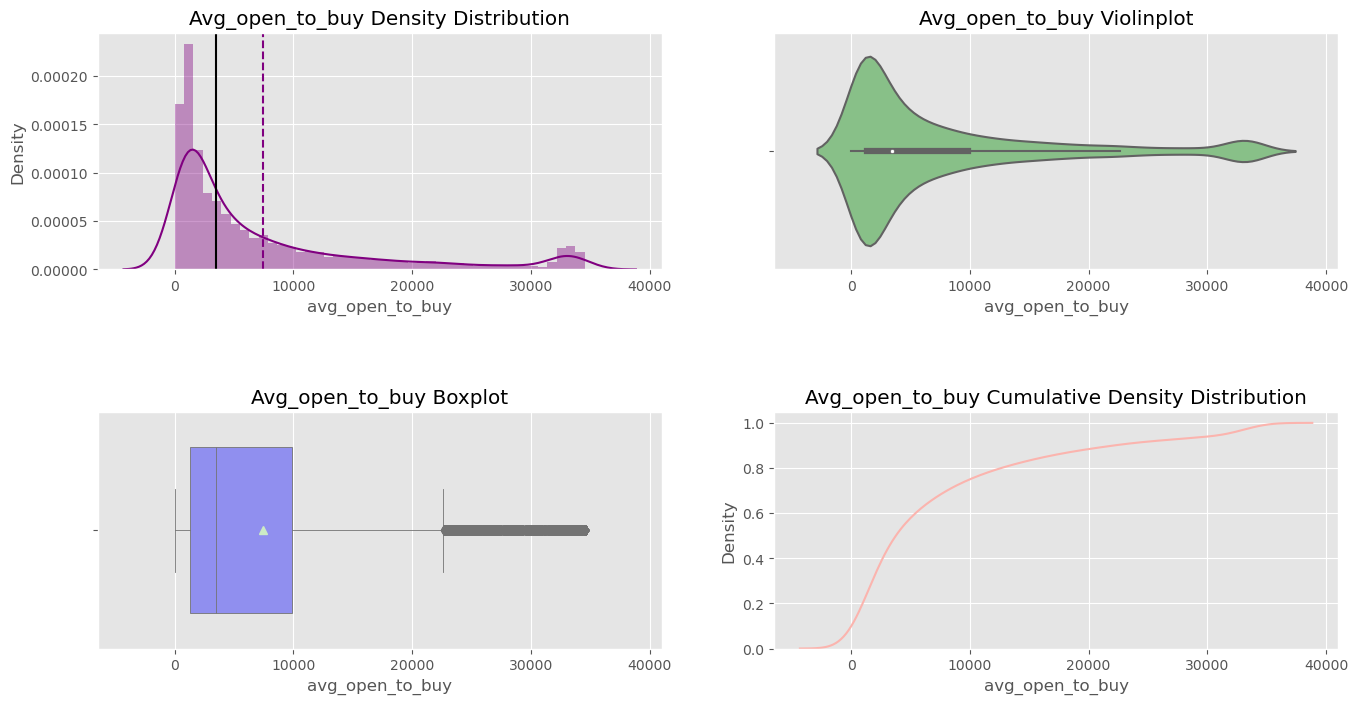

In [33]:
summary(data, "avg_open_to_buy")

* Average Open to Buy has lots of higher end outliers, which means there are customers who uses only very small amount of their credit limit
* Data is right skewed

5 Point Summary of Total_amt_chng_q4_q1 Attribute:

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |     0 | 0.631 | 0.736 | 0.859 | 3.397 |
+-------+-------+-------+-------+-------+-------+


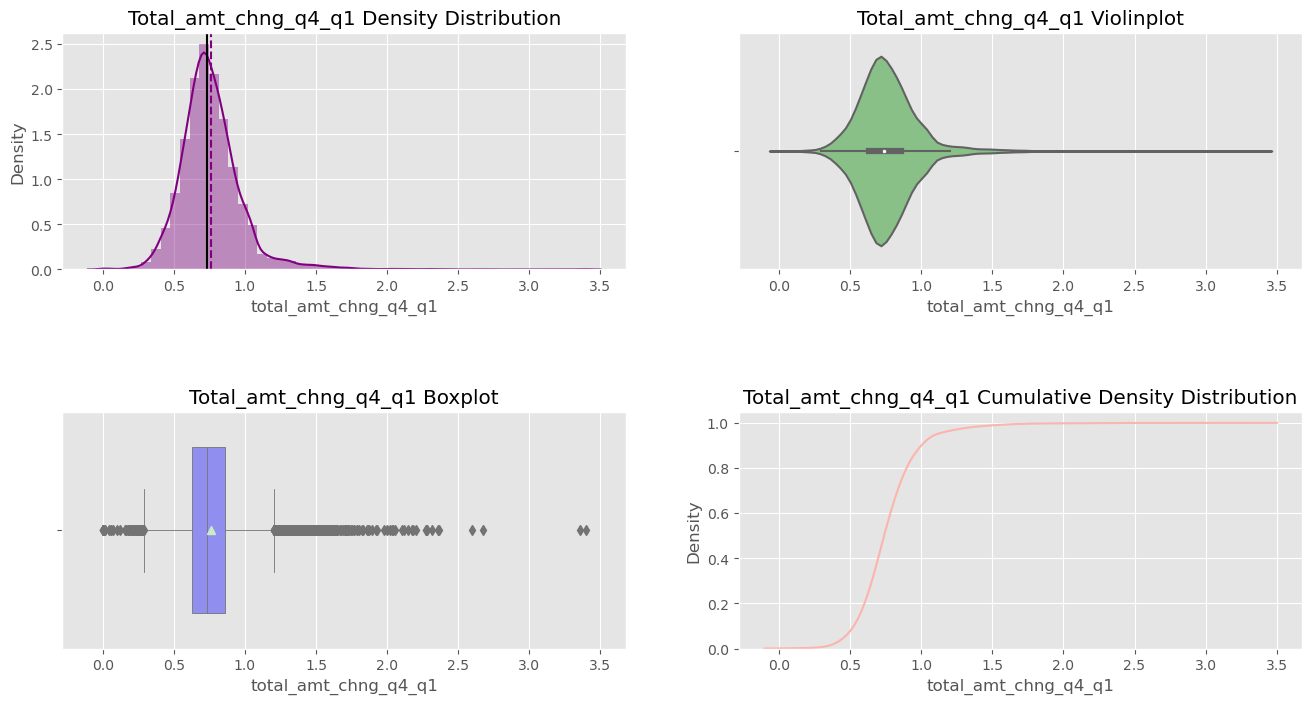

In [34]:
summary(data, "total_amt_chng_q4_q1")

Outliers are on both higher and lower end

5 Point Summary of Total_trans_amt Attribute:

+-------+-------+--------+------+------+-------+
|       |   Min |     Q1 |   Q2 |   Q3 |   Max |
|-------+-------+--------+------+------+-------|
| Value |   510 | 2155.5 | 3899 | 4741 | 18484 |
+-------+-------+--------+------+------+-------+


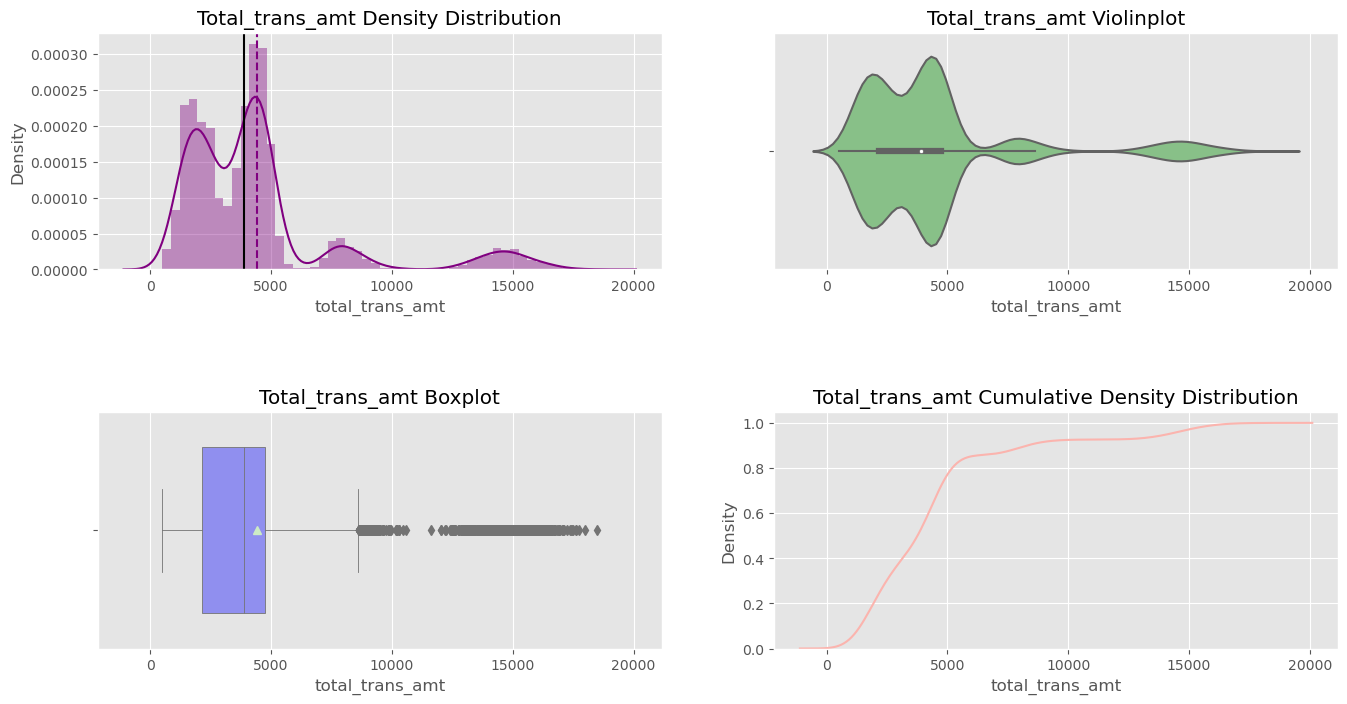

In [35]:
summary(data, "total_trans_amt")

Total Transaction Amount has lots of higher end outliers

5 Point Summary of Total_trans_ct Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    10 |   45 |   67 |   81 |   139 |
+-------+-------+------+------+------+-------+


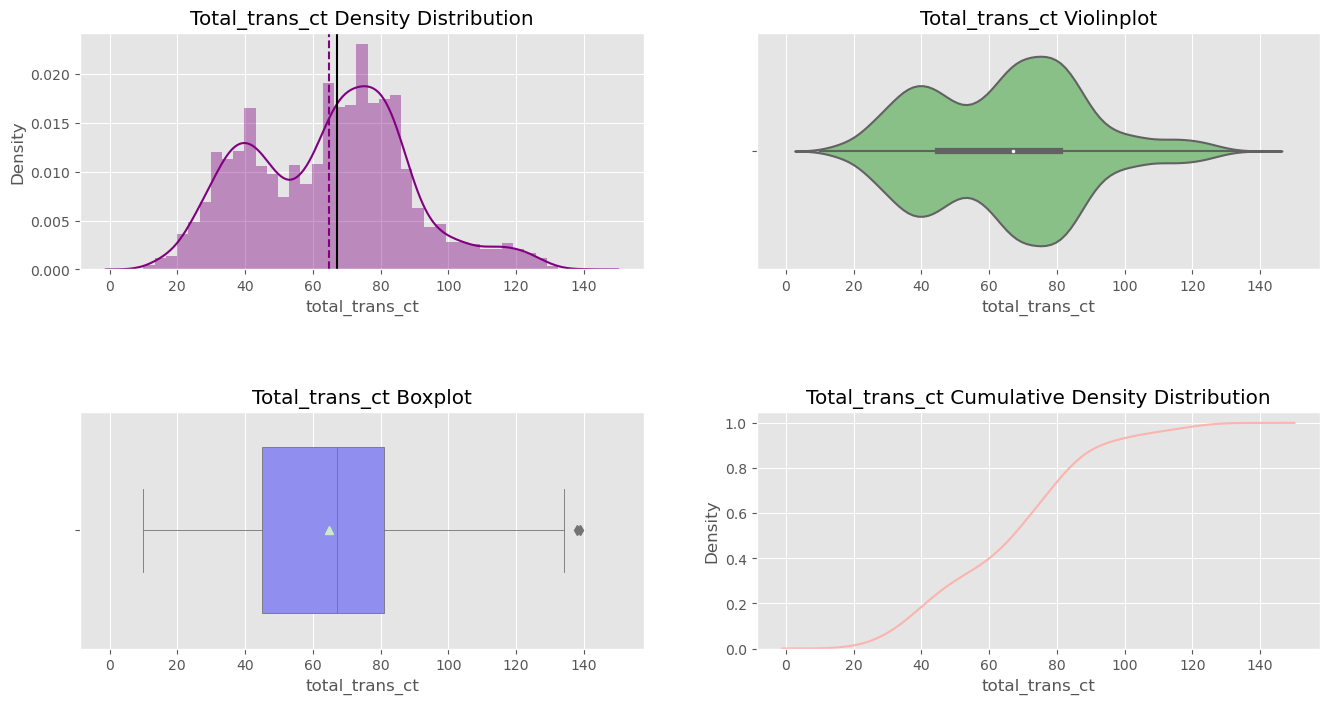

In [36]:
summary(data, "total_trans_ct")

5 Point Summary of Total_ct_chng_q4_q1 Attribute:

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |     0 | 0.582 | 0.702 | 0.818 | 3.714 |
+-------+-------+-------+-------+-------+-------+


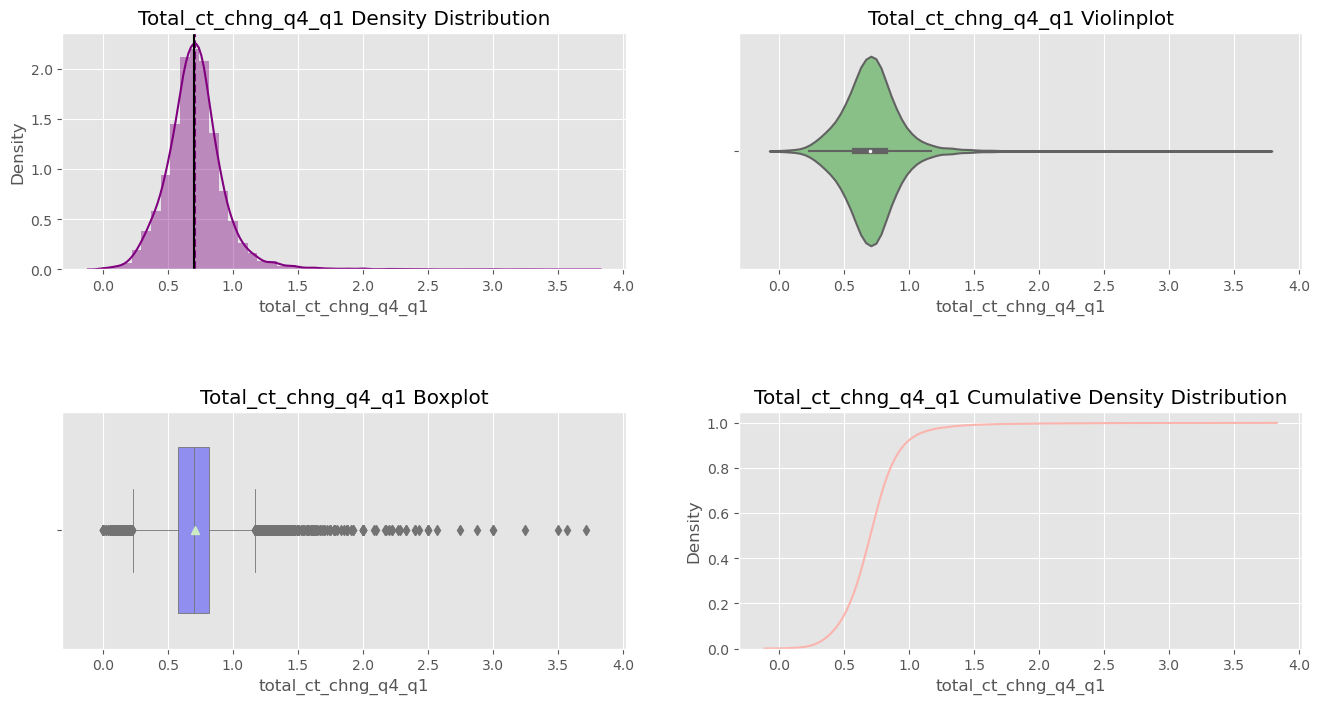

In [37]:
summary(data, "total_ct_chng_q4_q1")

Outliers are on both higher and lower end

5 Point Summary of Avg_utilization_ratio Attribute:

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |     0 | 0.023 | 0.176 | 0.503 | 0.999 |
+-------+-------+-------+-------+-------+-------+


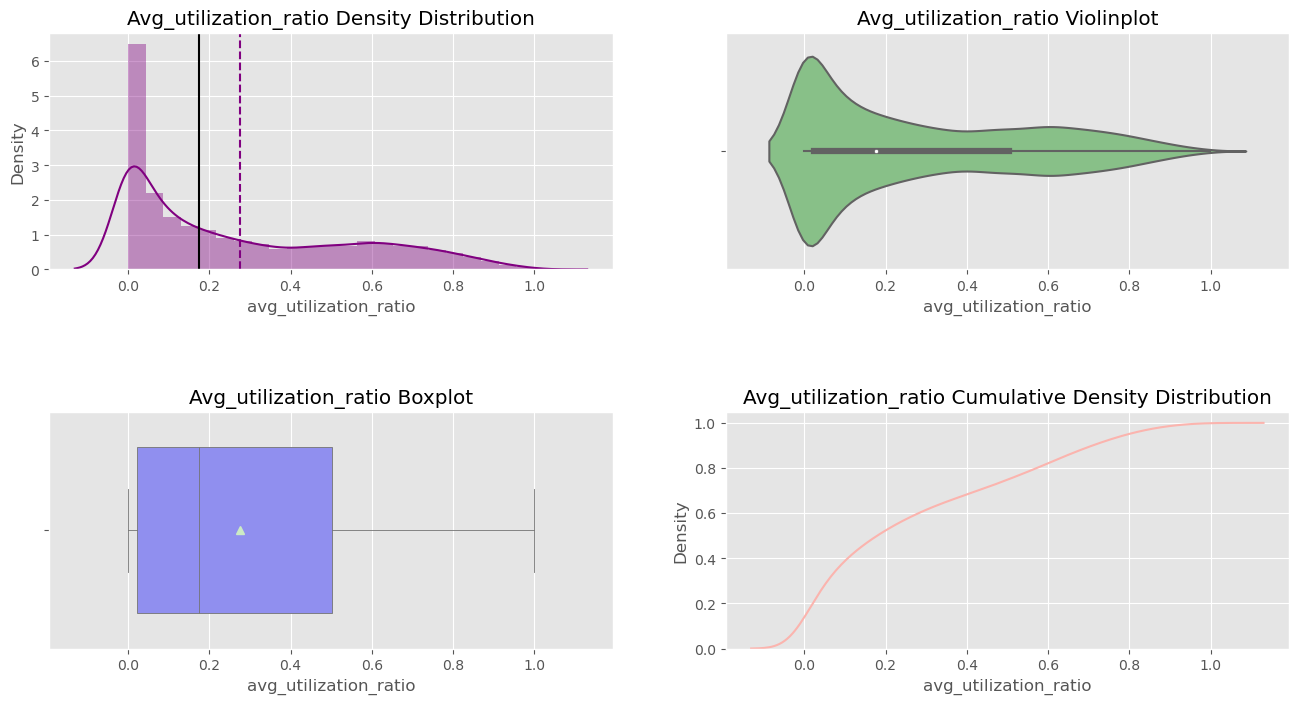

In [38]:
summary(data, "avg_utilization_ratio")

Average utilization is right skewed

Percentage on bar chart for Categorical Features

For the categorical variables, it is best to analyze them at percentage of total on bar charts Below function takes a category column as input and plots bar chart with percentages on top of each bar

In [39]:
# Below code plots grouped bar for each categorical feature

def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):
    '''
    The function takes a category column as input and plots bar chart with percentages on top of each bar
    
    Usage:
    ------
    
    perc_on_bar(df, ['age'], 'prodtaken')
    '''
    
    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(16,3*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order  
        ax=sns.countplot(data=data, x=col, palette = 'crest', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')

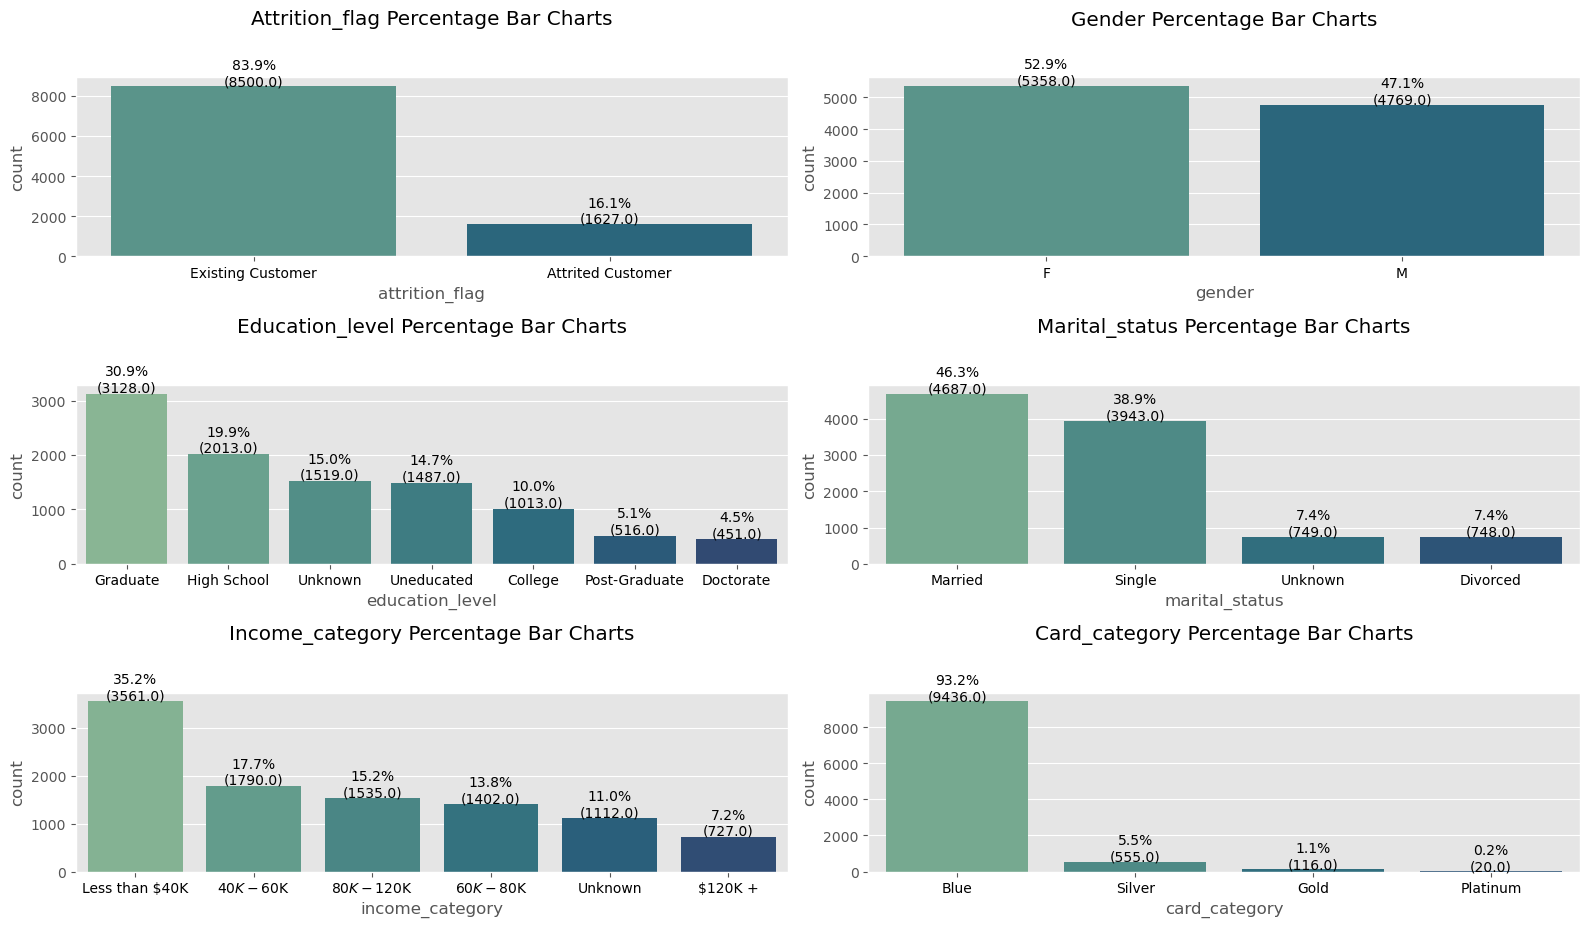

In [40]:
category_columns = data.select_dtypes(include="category").columns.tolist()
target_variable = "attrition_flag"
perc_on_bar(data, category_columns, target_variable)

* High Imbalance in data since the existing vs. attrited customers ratio is 84:16
* Data is almost equally distributed between Males and Females
* 31% customers are Graduate
* ~85% customers are either Single or Married, where 46.7% of the customers are Married
* 35% customers earn less than 40k USD and 36 percent earns 60k USD or more
* ~93% customers have Blue card

# Bi-variate Analysis
Goal of Bi-variate analysis is to find inter-dependencies between features.

Target vs. All numerical columns

In [41]:
# Below code plots box charts for each numerical feature by each type of Personal Loan (0: Not Borrowed, 1: Borroed)
def box_by_target(data: pd.DataFrame, numeric_columns, target, include_outliers):
    """
    The function takes a category column, target column, and whether to include outliers or not as input
    and plots bar chart with percentages on top of each bar

    Usage:
    ------

    perc_on_bar(['age'], 'prodtaken', True)
    """
    subplot_cols = 2
    subplot_rows = int(len(numeric_columns) / 2 + 1)
    plt.figure(figsize=(16, 3 * subplot_rows))
    for i, col in enumerate(numeric_columns):
        plt.subplot(8, 2, i + 1)
        sns.boxplot(
            data=data,
            x=target,
            y=col,
            orient="vertical",
            palette="Blues",
            showfliers=include_outliers,
        )
        plt.tight_layout()
        plt.title(str(i + 1) + ": " + target + " vs. " + col, color="black")

With outliers

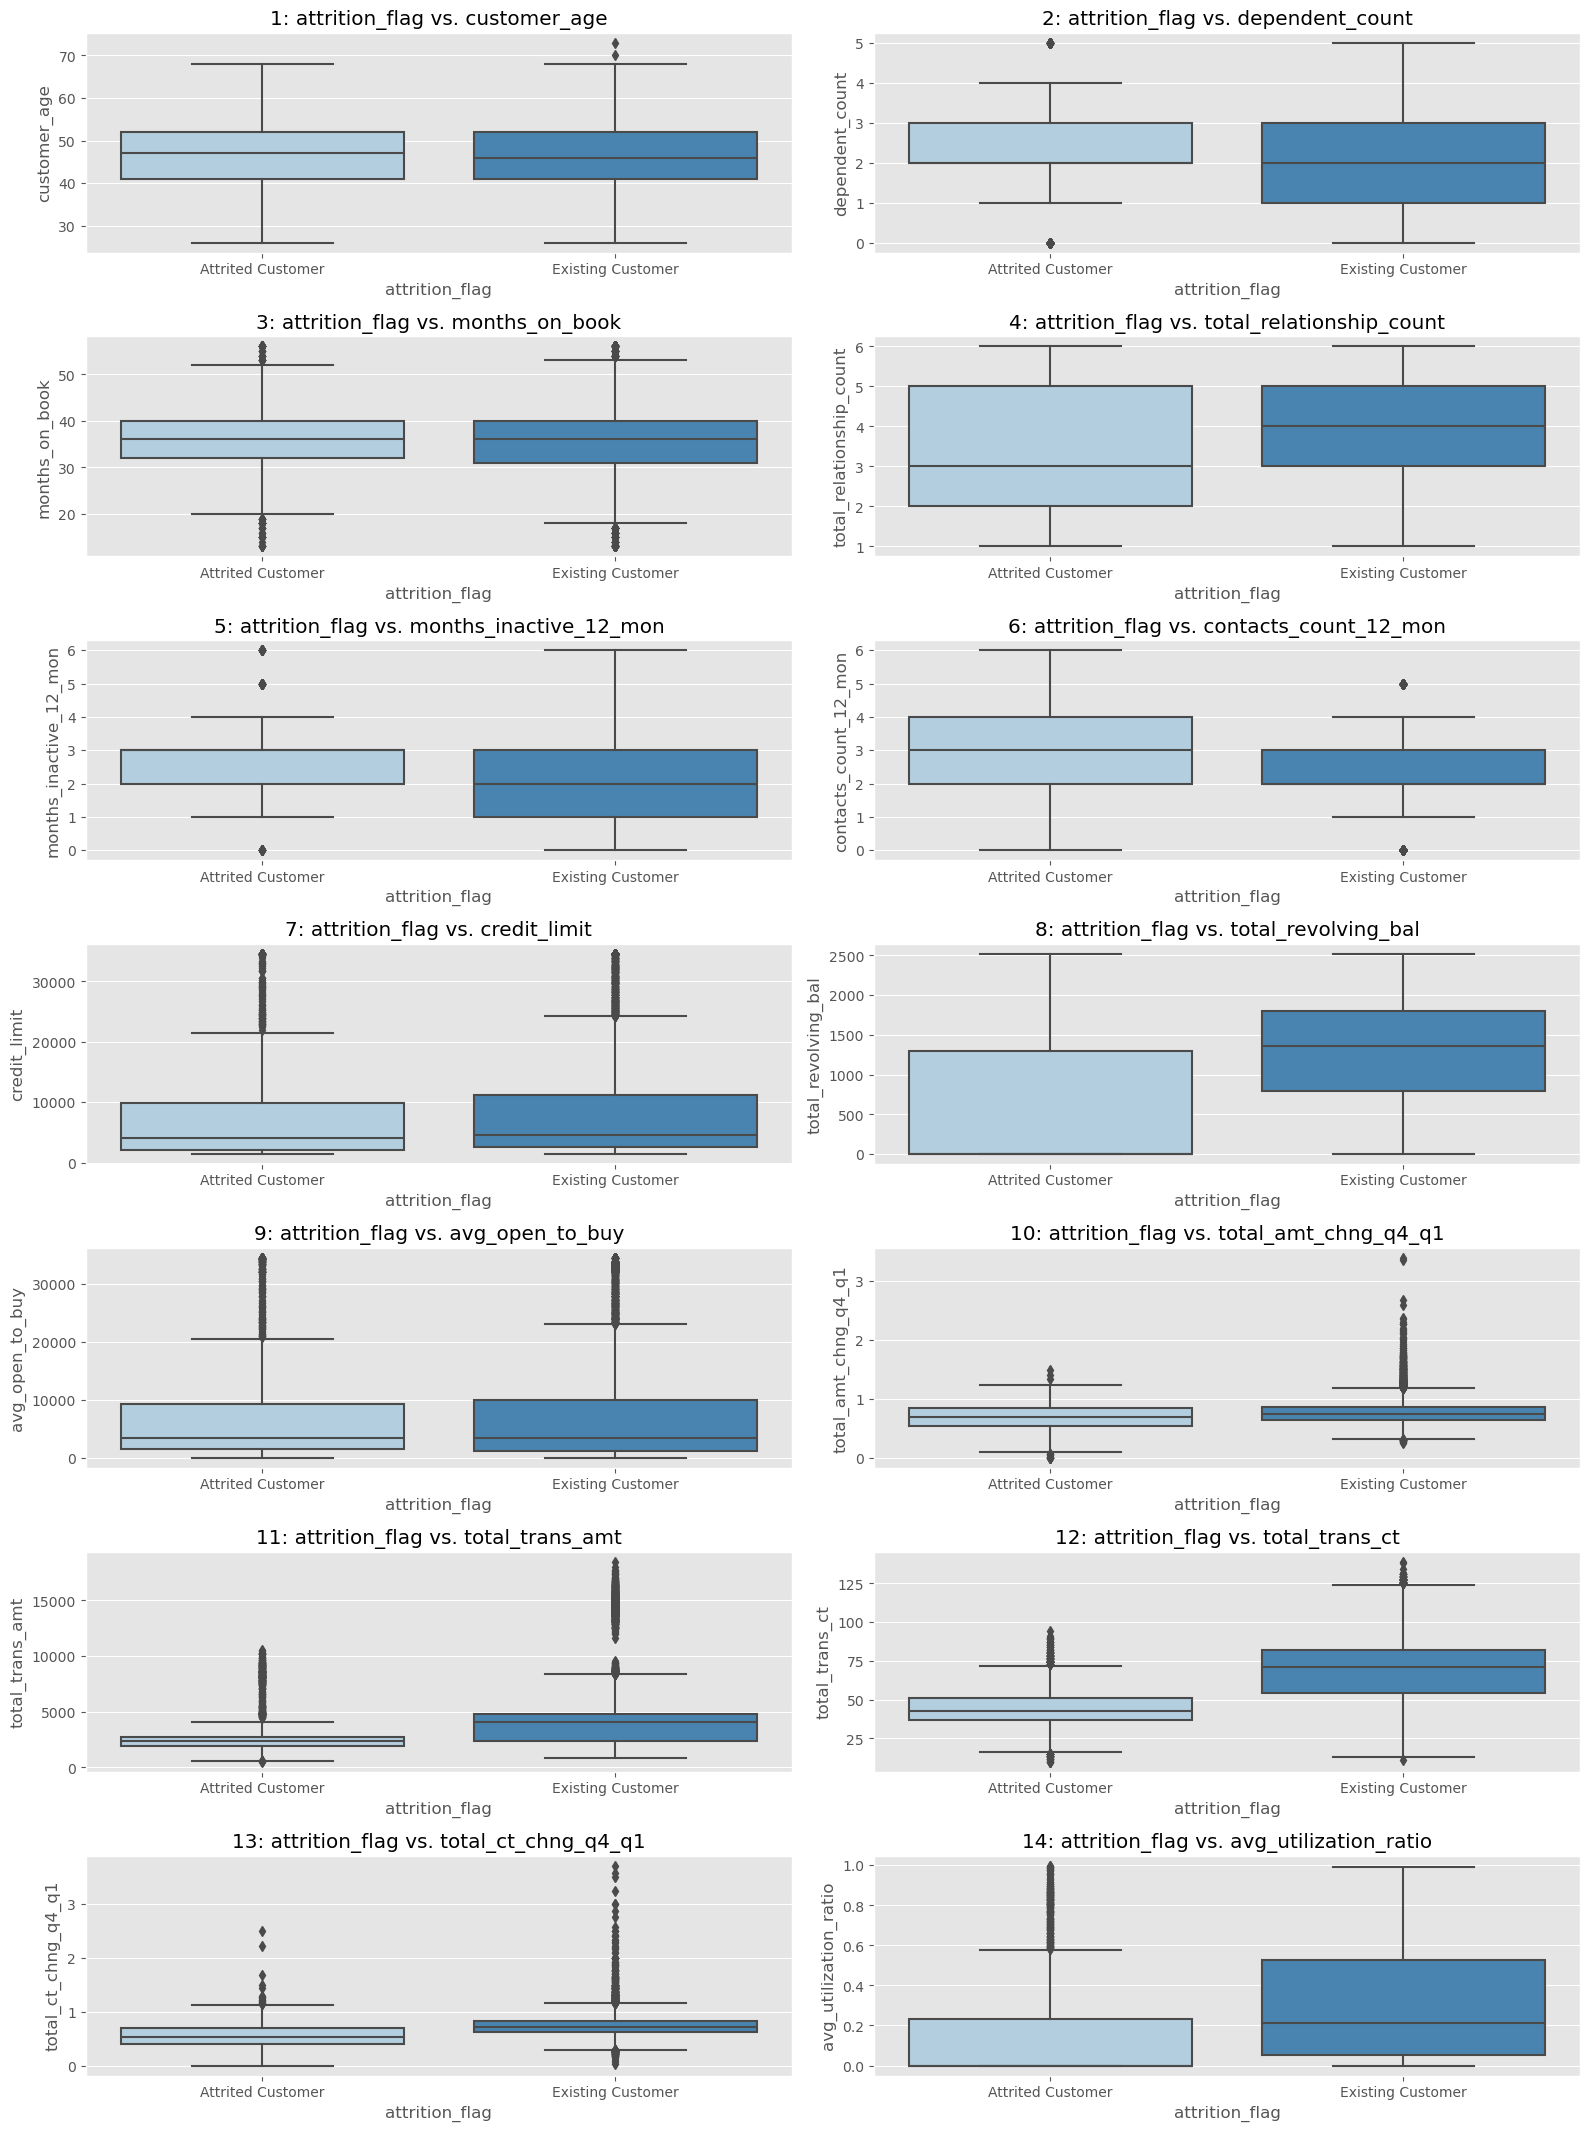

In [42]:
numeric_columns = data.select_dtypes(exclude="category").columns.tolist()
target_variable = "attrition_flag"
box_by_target(data, numeric_columns, target_variable, True)

Without outliers

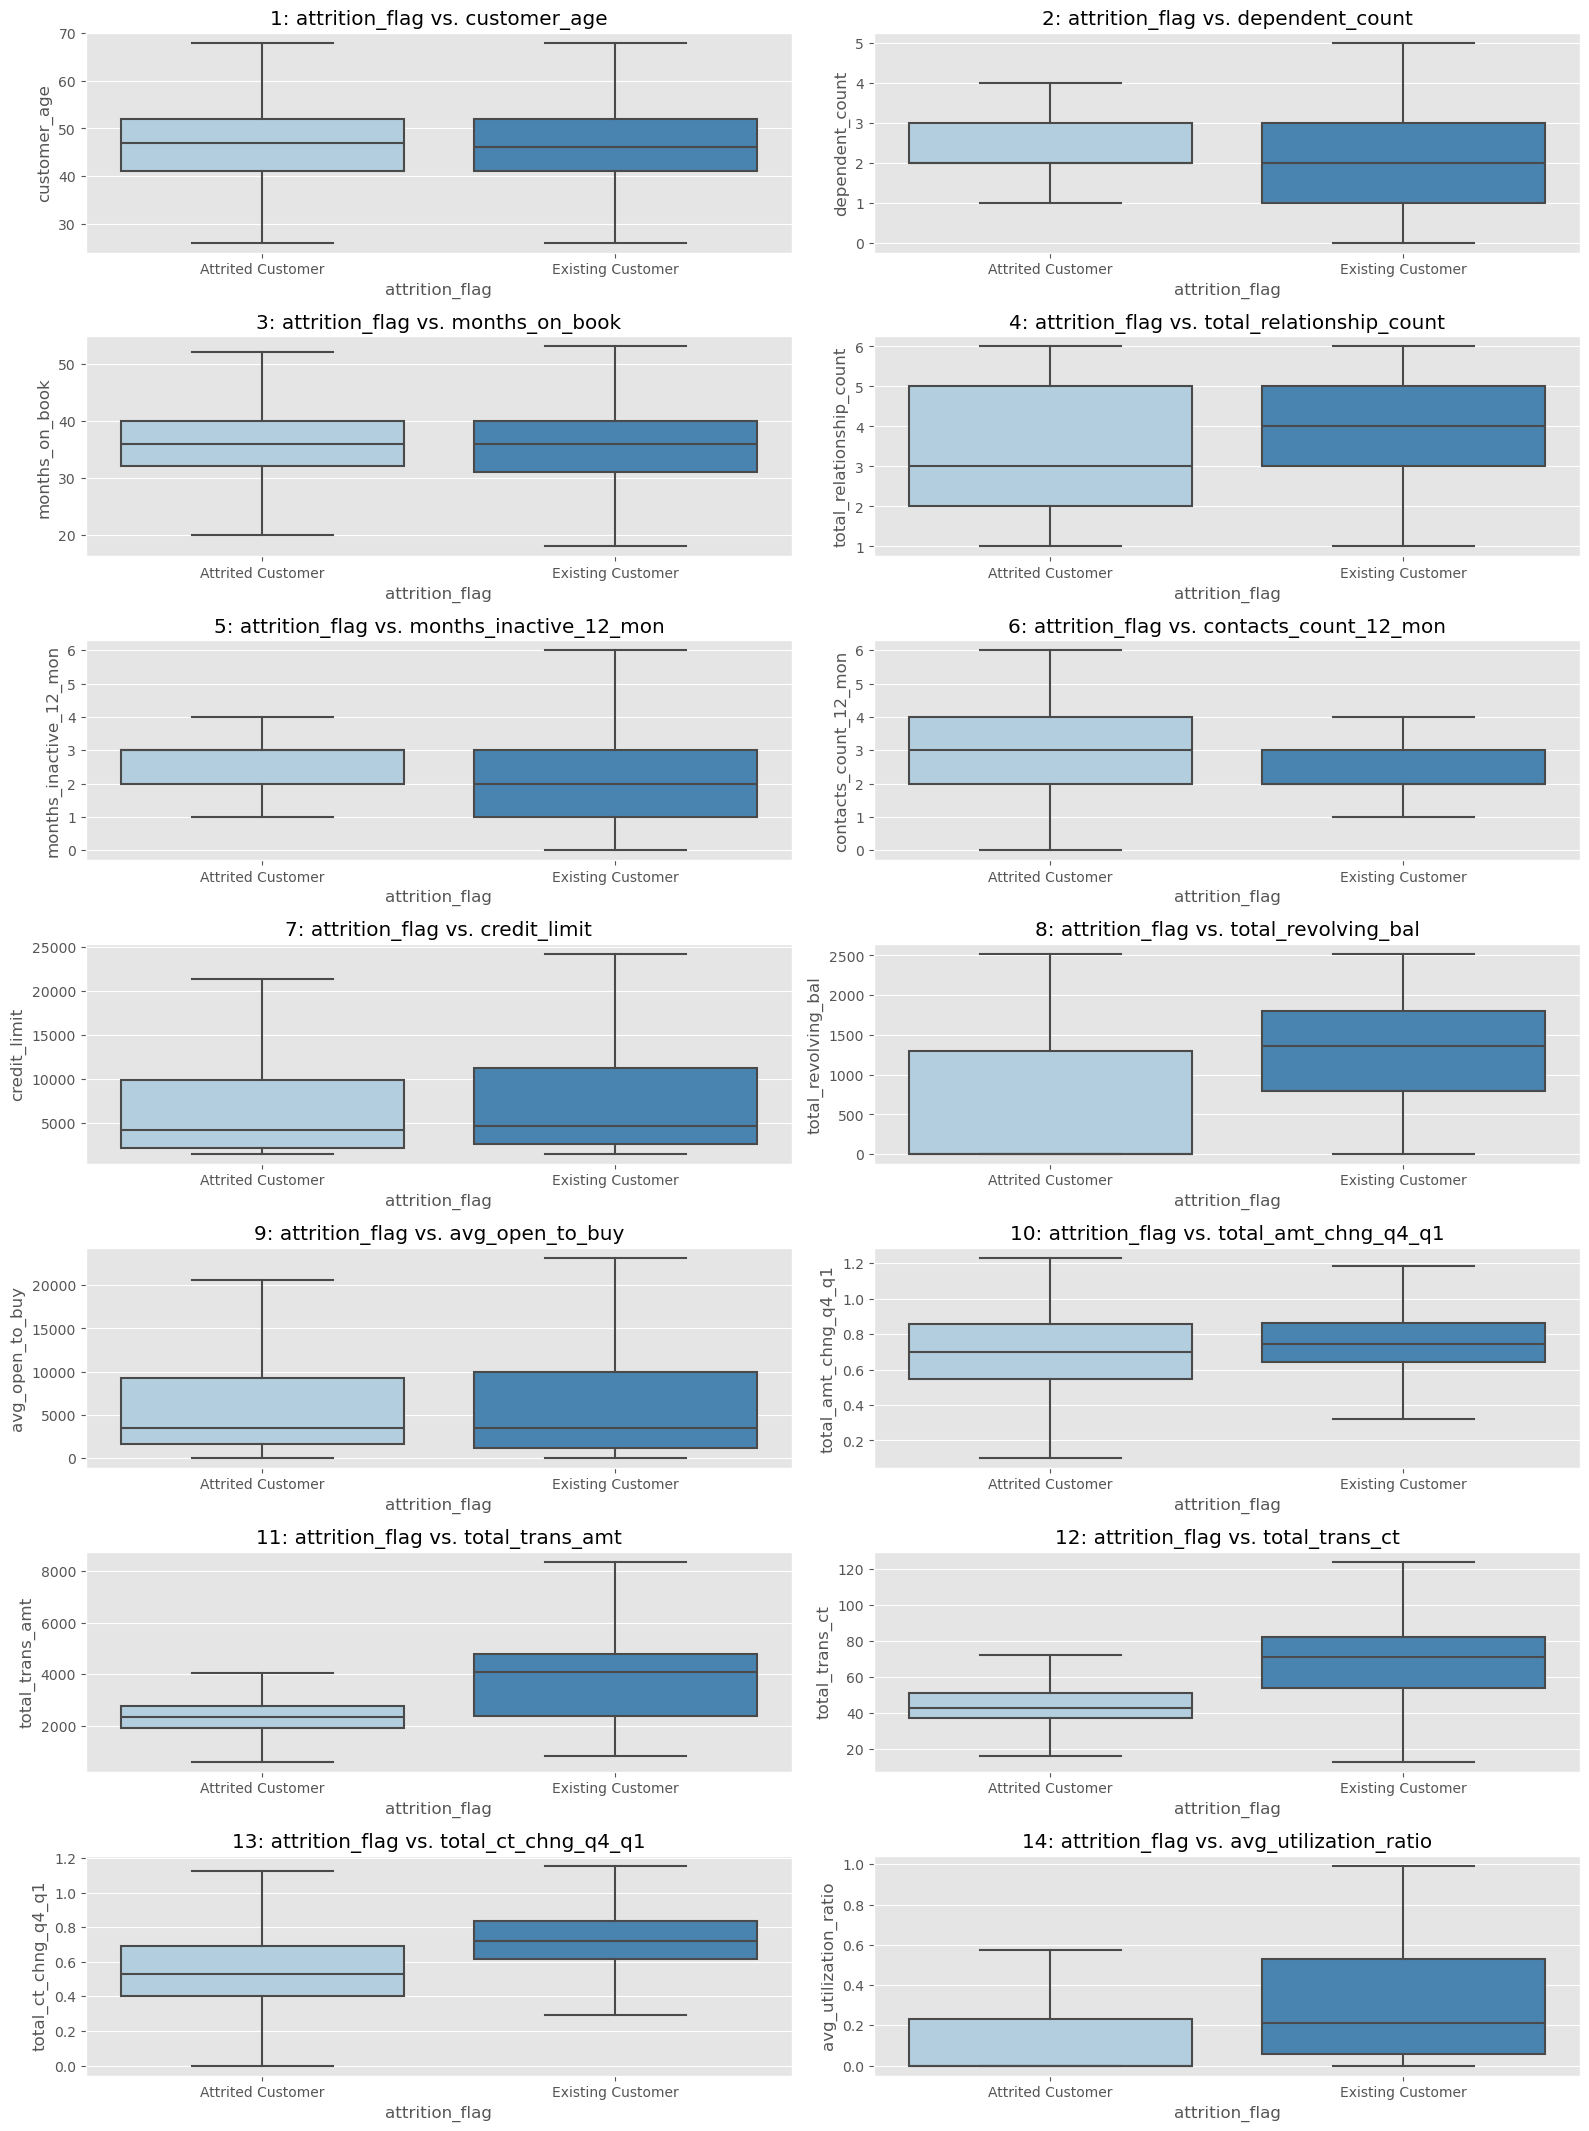

In [43]:
box_by_target(data, numeric_columns, target_variable, False)

# Attrited customers have  

* Lower total transaction amount
* Lower total transaction count
* Lower utilization ratio
* Lower transaction count change Q4 to Q1
* Higher number of times contacted with or by the bank

# Target vs. All Categorical Columns

In [44]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(df: pd.DataFrame, x, target):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm

    color1 = cm.inferno(np.linspace(0.4, 0.8, 30))
    color2 = cm.viridis(np.linspace(0.4, 0.8, 30))
    sns.set_palette("cubehelix")
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    """
    Draw a Pie Chart on first subplot.
    """
    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct / 100.0 * np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax[0].pie(
        mydata_values,
        autopct=lambda pct: func(pct, mydata_values),
        textprops=dict(color="w"),
    )

    ax[0].legend(
        wedges,
        mydata_index,
        title=x.capitalize(),
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
    )

    plt.setp(autotexts, size=12)

    ax[0].set_title(f"{x.capitalize()} Pie Chart")

    """
    Draw a Bar Graph on second subplot.
    """

    df = pd.pivot_table(
        data, index=[x], columns=[target], values=["credit_limit"], aggfunc=len
    )

    labels = df.index.tolist()
    no = df.values[:, 1].tolist()
    yes = df.values[:, 0].tolist()

    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(
        l - width / 2, no, width, label="Existing Customer", color=color1
    )
    rects2 = ax[1].bar(
        l + width / 2, yes, width, label="Attrited Customer", color=color2
    )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel("Scores")
    ax[1].set_title(f"{x.capitalize()} Bar Graph")
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()

    def autolabel(rects):

        """Attach a text label above each bar in *rects*, displaying its height."""

        for rect in rects:
            height = rect.get_height()
            ax[1].annotate(
                "{}".format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                fontsize="medium",
                ha="center",
                va="bottom",
            )

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

    """
    Draw a Stacked Bar Graph on bottom.
    """

    sns.set(palette="tab10")
    tab = pd.crosstab(data[x], data[target], normalize="index")

    tab.plot.bar(stacked=True, figsize=(16, 3))
    plt.title(x.capitalize() + " Stacked Bar Plot")
    plt.legend(loc="upper right", bbox_to_anchor=(0, 1))
    plt.show()

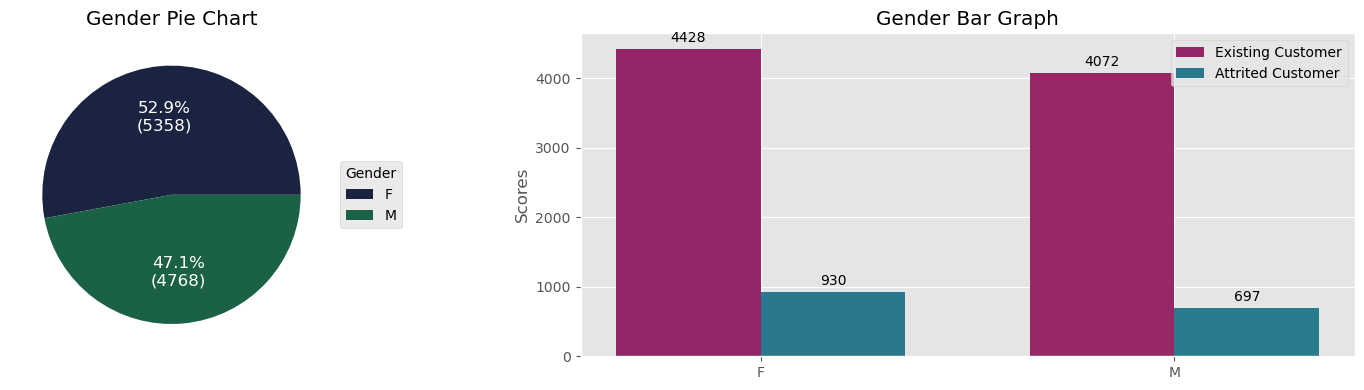

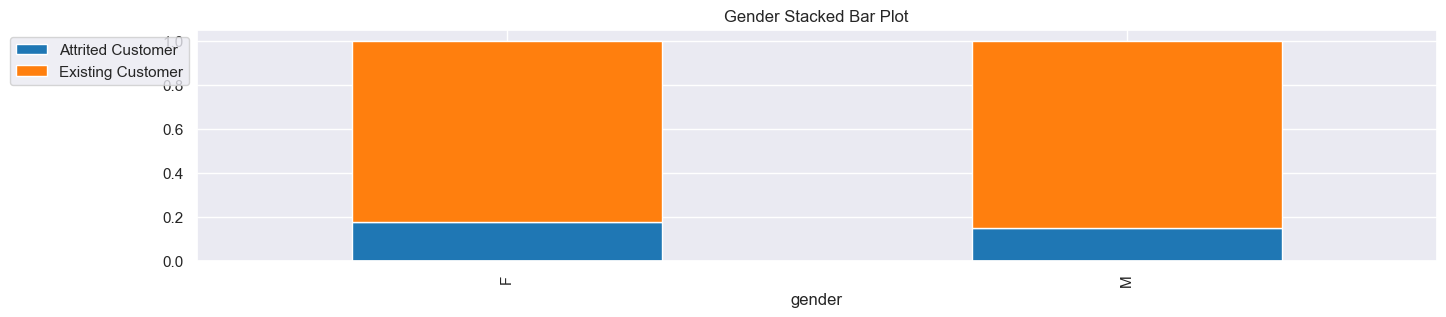

In [45]:
cat_view(data, "gender", "attrition_flag")

Attrition does not seem to be related with Gender

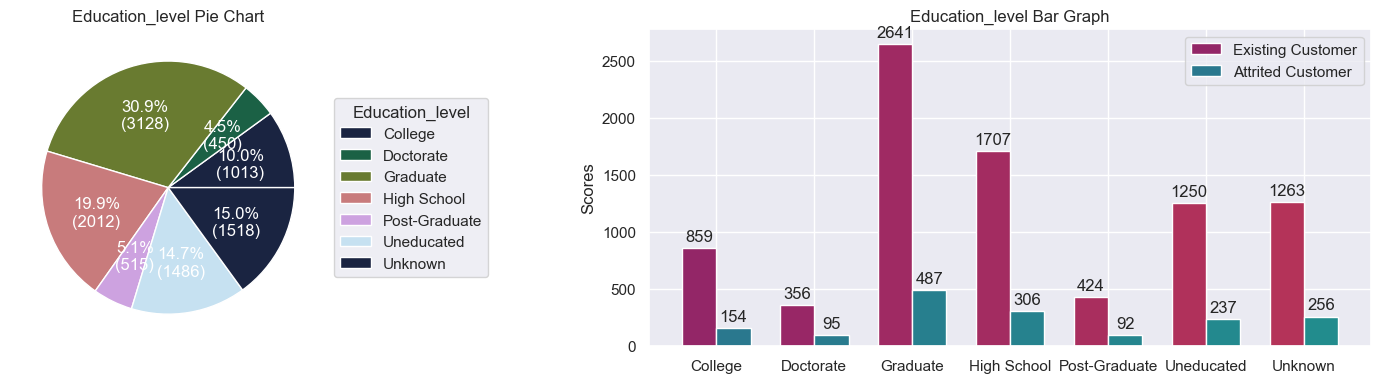

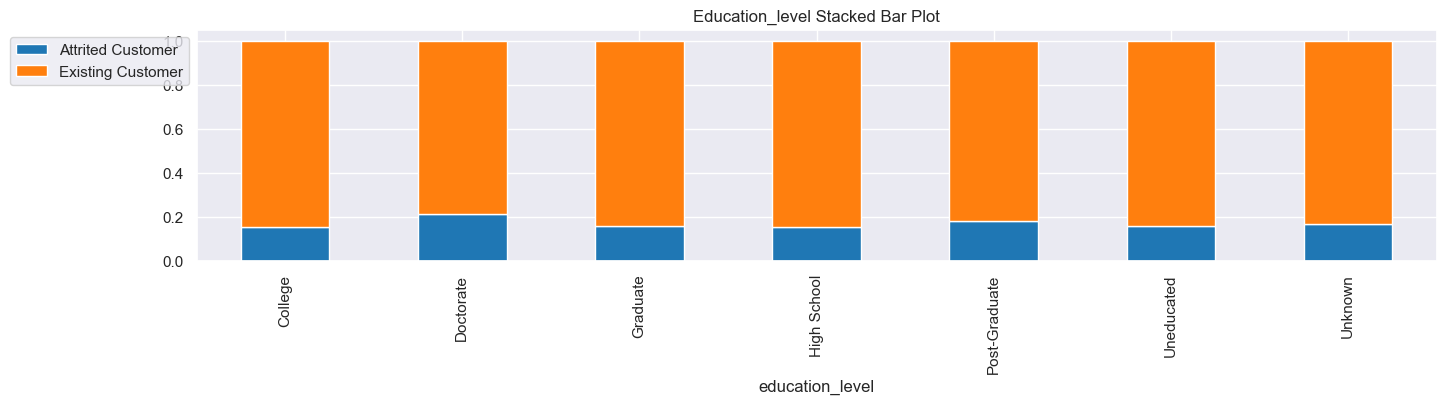

In [46]:
cat_view(data, "education_level", "attrition_flag")

Attrition does not seem to be related with Education

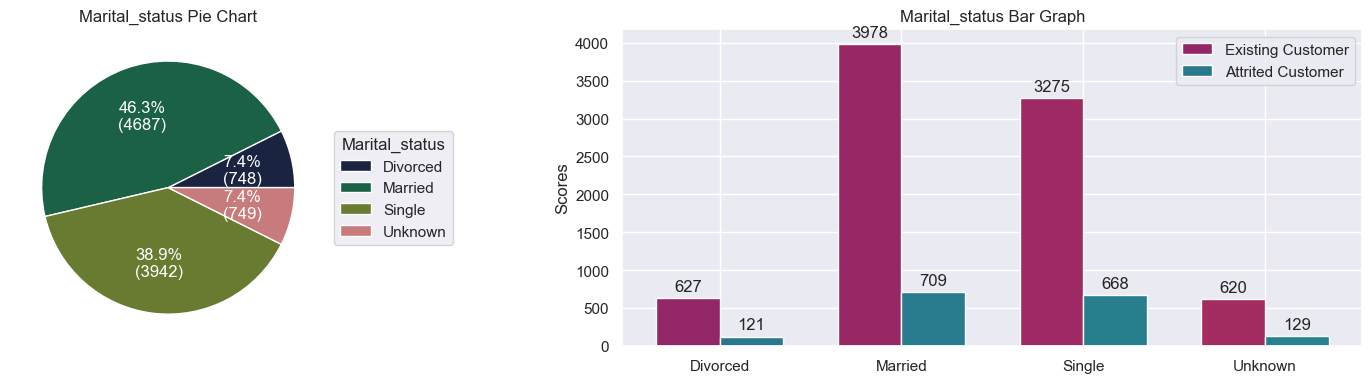

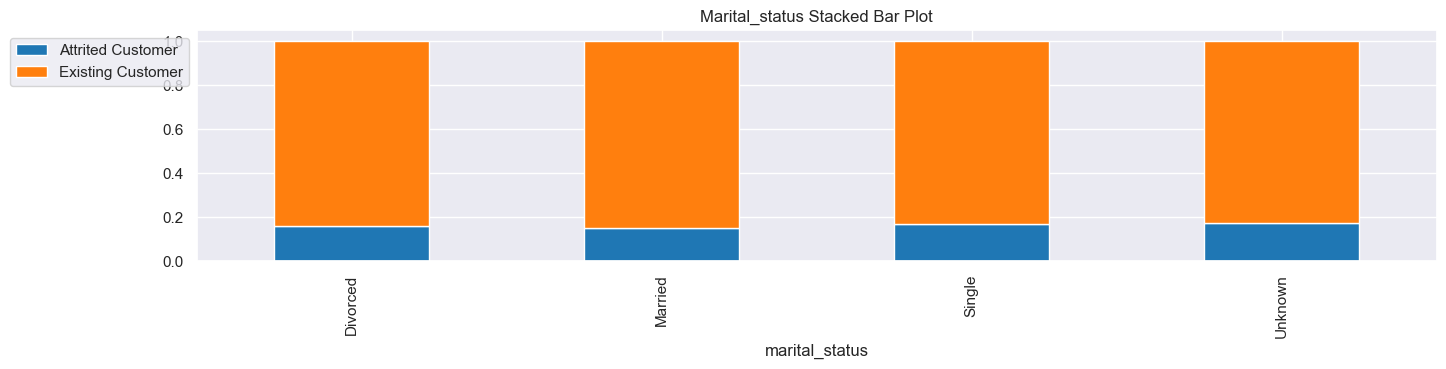

In [47]:
cat_view(data, "marital_status", "attrition_flag")

Attrition does not seem to be related with Marital Status

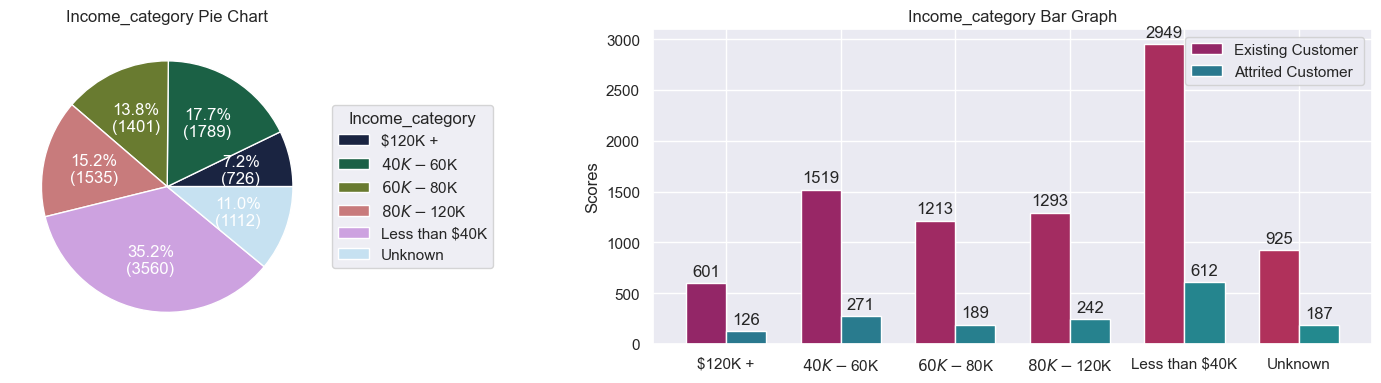

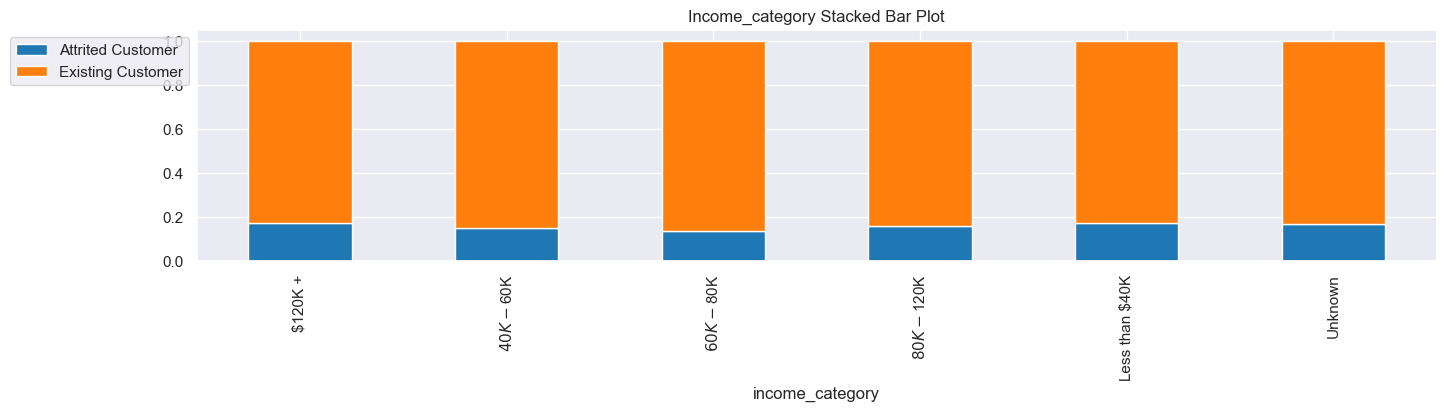

In [48]:
cat_view(data, "income_category", "attrition_flag")

Attrition does not seem to be related with Income Category

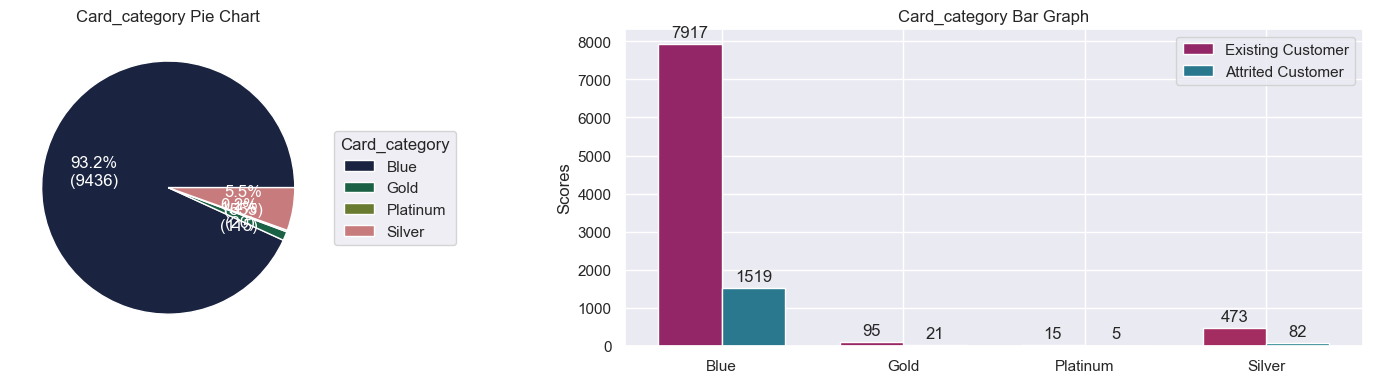

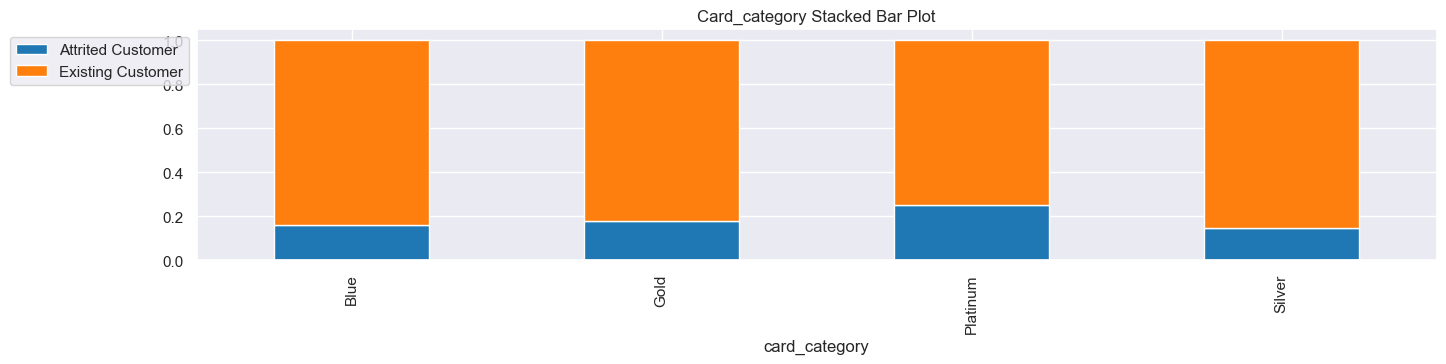

In [49]:
cat_view(data, "card_category", "attrition_flag")

Platinum card holder are appearing to be having attrition tendency, however, since there are only 20 data points for platinum card holders, this observation would be biased

# Multi-variate Plots
Pairplot of all available numeric columns, hued by Personal Loan

<Figure size 2000x2000 with 0 Axes>

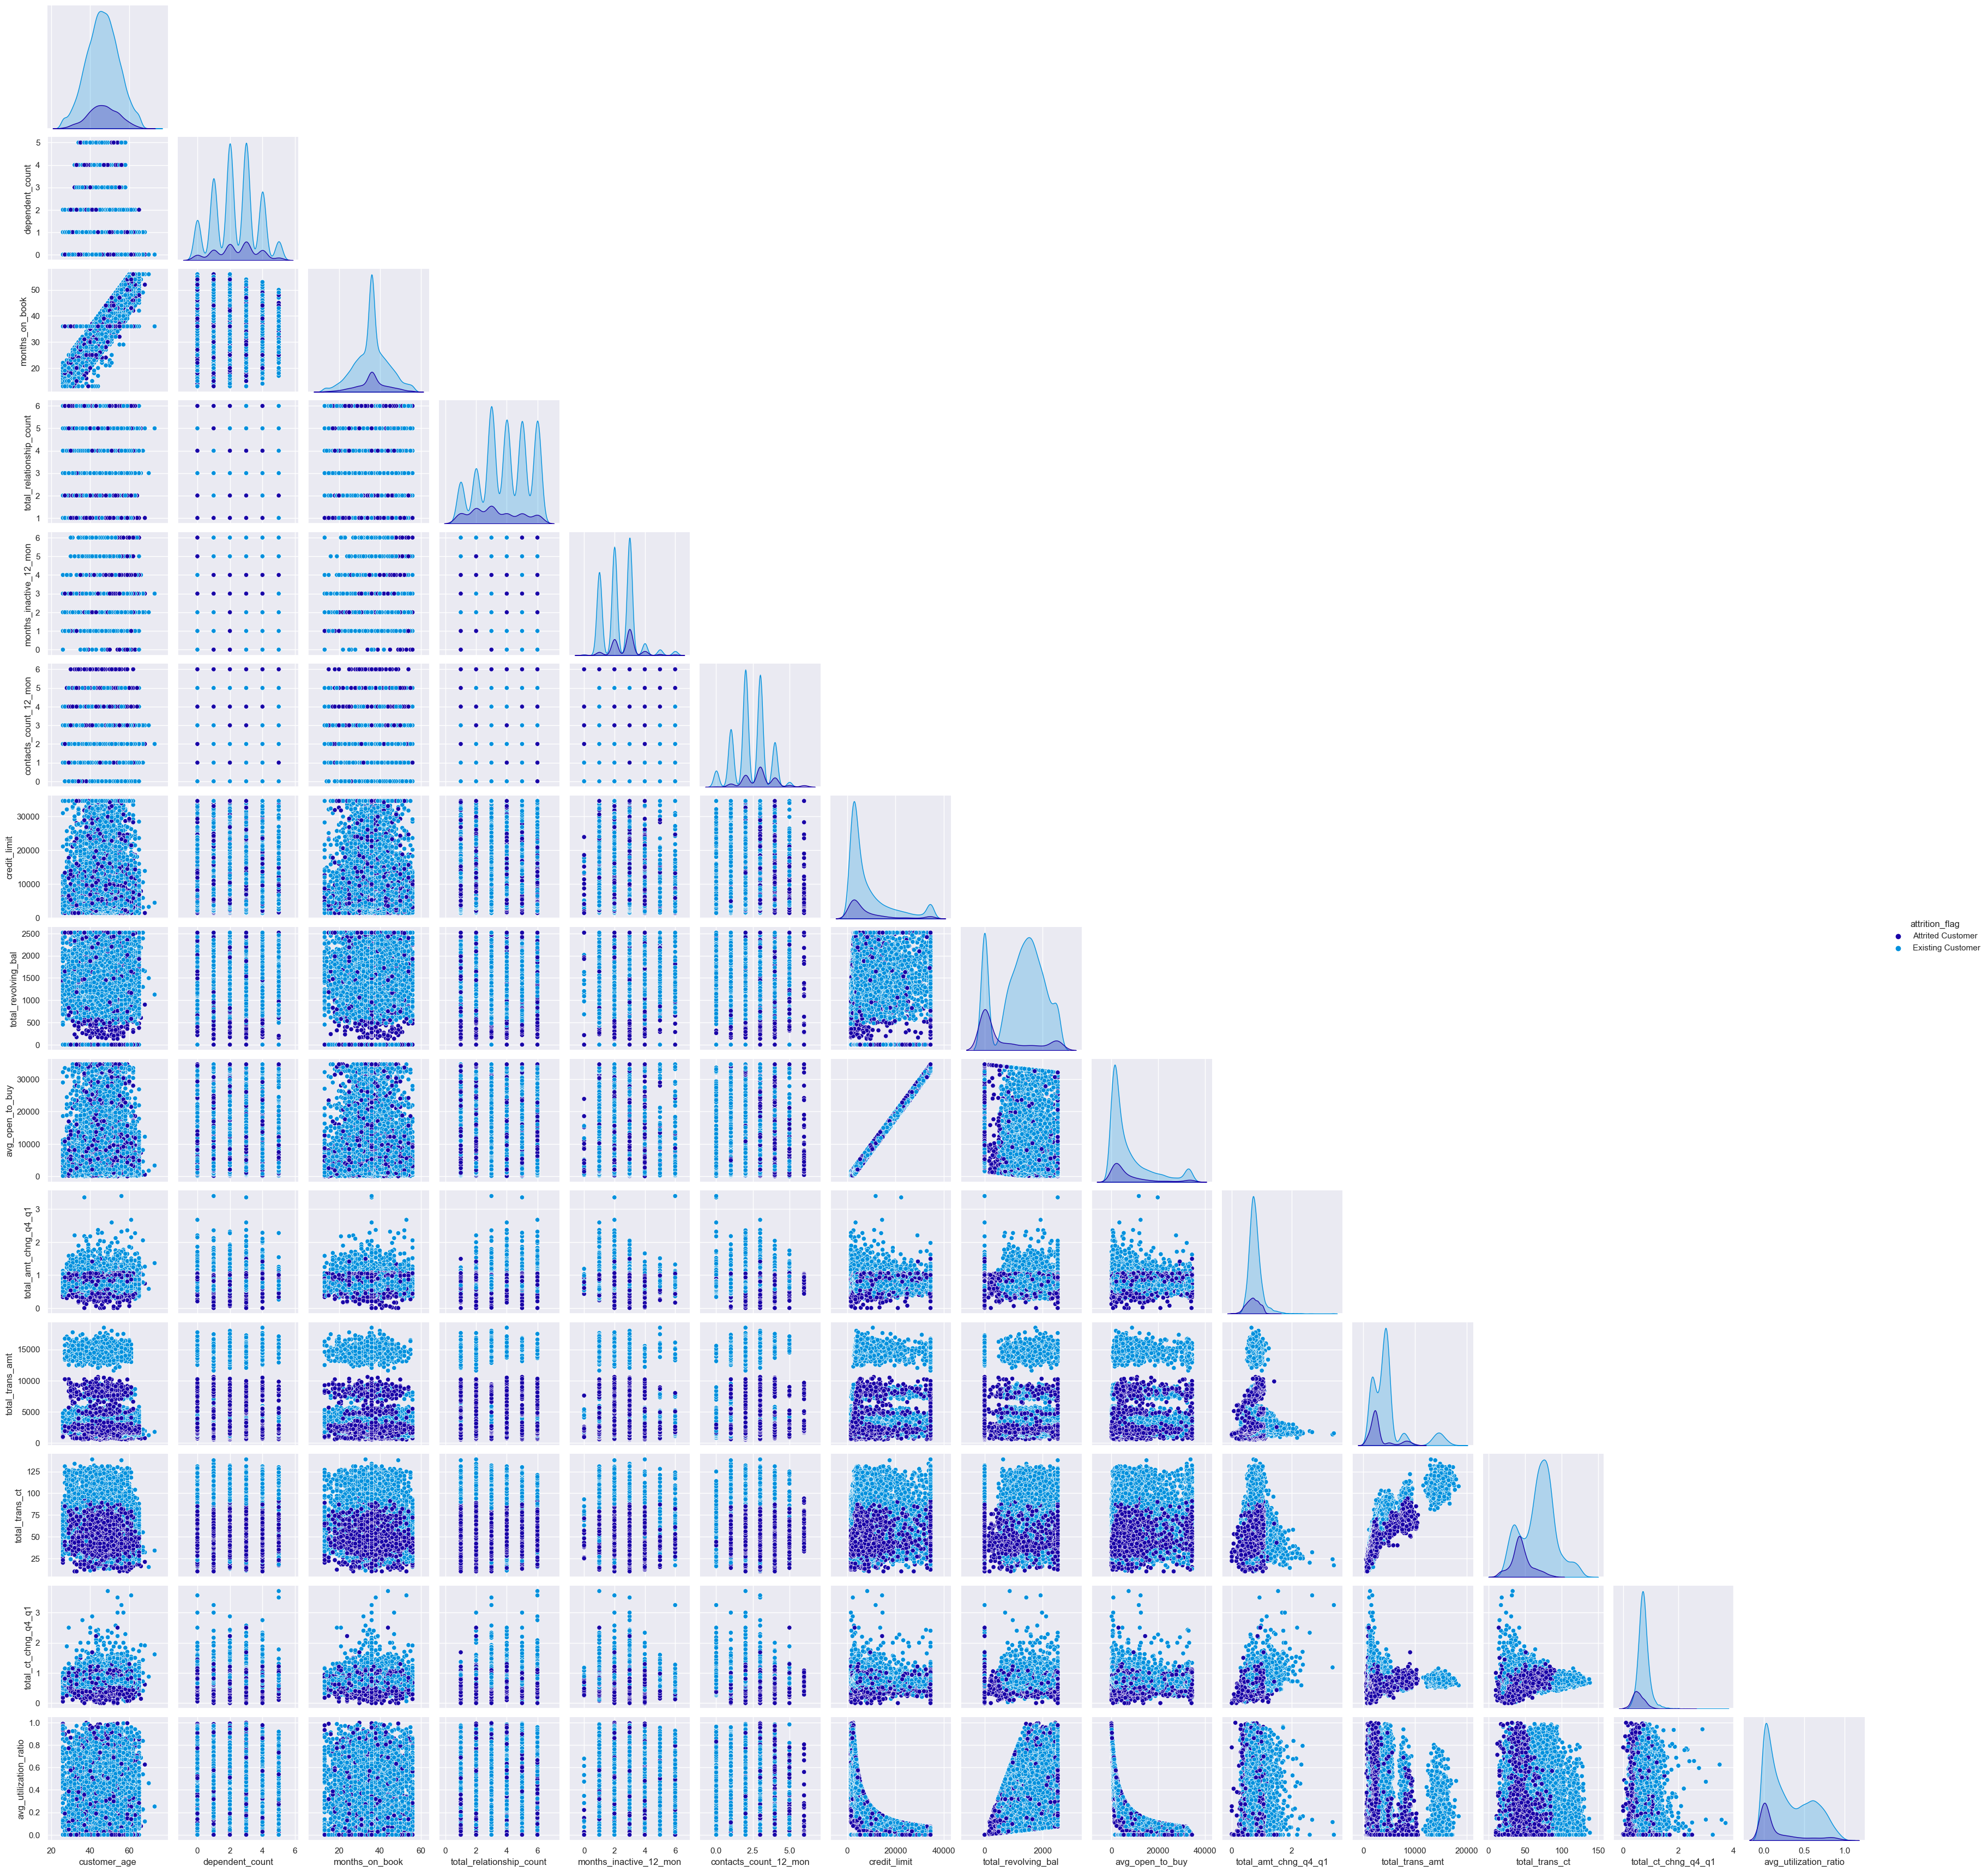

In [50]:
# Below plot shows correlations between the numerical features in the dataset
plt.figure(figsize=(20, 20))
sns.set(palette="nipy_spectral")
sns.pairplot(data=data, hue="attrition_flag", corner=True)

* There are clusters formed with respect to attrition for the variables total revolving amount, total amount change Q4 to Q1, total transaction amount, total transaction count, total transaction count change Q4 to Q1
* There are strong correlation between a few columns as well, which we'll check in below correlation heatmap.

# Heatmap to understand correlations between independent and dependent variables

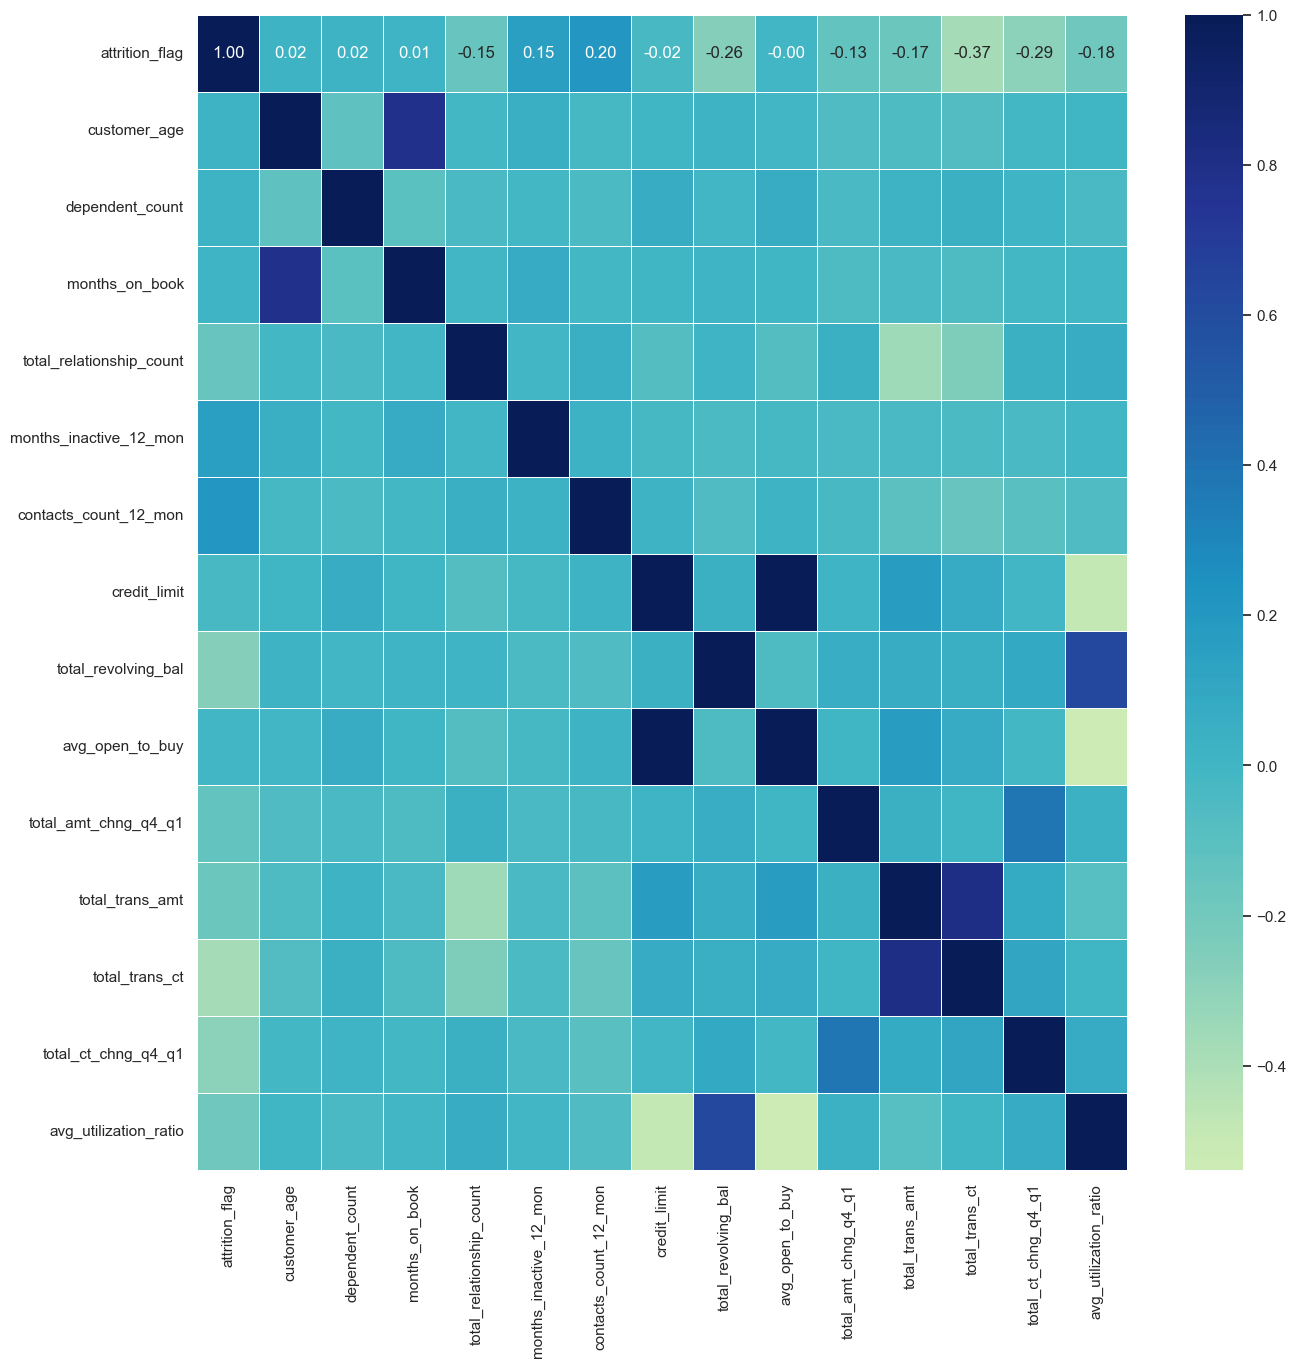

In [126]:
# Plotting correlation heatmap of the features
codes = {'Existing Customer':0, 'Attrited Customer':1}
data_clean = data.copy()
data_clean['attrition_flag'] = data_clean['attrition_flag'].map(codes).astype(int)


sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data_clean.corr(numeric_only=True),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=True,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

* Credit Limit and Average Open to Buy have 100% collinearity
* Months on book and Customer Age have quite strong correlation
* Average Utilization Ration and Total Revolving Balance are also a bit correlated it appears
* Attrition Flag does not have highly strong correlation with any of the numeric variables
* Customer Churn appears to be uncorrelated with Customer Age, Dependent Count, Months on Book, Open to Buy, Credit Limit, we'll remove these from dataset

# Data Preprocessing
Pre-processing steps:
1. Data Split into Dependent and Target sets
2. Data Split to Train, Test and Validation sets
3. Standardize feature names
4. Drop unnecessary columns (Client Number, Customer Age, Dependent Count, Months on Book, Open to Buy, Credit Limit)
5. Missing Value/Incorrect Value treatment
6. Encoding
7. Scaling/Outlier treatment

# Building data transformer functions and classes

In [52]:
# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    
    
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_

Firstly we'll work on building models individually after data pre-processing, and later we'll build an ML pipeline to run end to end process of pre-processing and model building. We are creating a data copy for the first part.

Creating data copy

In [53]:
df = churner.copy()
df.describe(include="all").T

count unique                top  freq  \
CLIENTNUM                10127.000    NaN                NaN   NaN   
Attrition_Flag               10127      2  Existing Customer  8500   
Customer_Age             10127.000    NaN                NaN   NaN   
Gender                       10127      2                  F  5358   
Dependent_count          10127.000    NaN                NaN   NaN   
Education_Level              10127      7           Graduate  3128   
Marital_Status               10127      4            Married  4687   
Income_Category              10127      6     Less than $40K  3561   
Card_Category                10127      4               Blue  9436   
Months_on_book           10127.000    NaN                NaN   NaN   
Total_Relationship_Count 10127.000    NaN                NaN   NaN   
Months_Inactive_12_mon   10127.000    NaN                NaN   NaN   
Contacts_Count_12_mon    10127.000    NaN                NaN   NaN   
Credit_Limit             10127.000    NaN                NaN   NaN   
Total_Revolving_Bal      10127.000    NaN                NaN   NaN   
Avg_Open_To_Buy          10127.000    NaN                NaN   NaN   
Total_Amt_Chng_Q4_Q1     10127.000    NaN                NaN   NaN   
Total_Trans_Amt          10127.000    NaN                NaN   NaN   
Total_Trans_Ct           10127.000    NaN                NaN   NaN   
Total_Ct_Chng_Q4_Q1      10127.000    NaN                NaN   NaN   
Avg_Utilization_Ratio    10127.000    NaN                NaN   NaN   

                                  mean          std           min  \
CLIENTNUM                739177606.334 36903783.450 708082083.000   
Attrition_Flag                     NaN          NaN           NaN   
Customer_Age                    46.326        8.017        26.000   
Gender                             NaN          NaN           NaN   
Dependent_count                  2.346        1.299         0.000   
Education_Level                    NaN          NaN           NaN   
Marital_Status                     NaN          NaN           NaN   
Income_Category                    NaN          NaN           NaN   
Card_Category                      NaN          NaN           NaN   
Months_on_book                  35.928        7.986        13.000   
Total_Relationship_Count         3.813        1.554         1.000   
Months_Inactive_12_mon           2.341        1.011         0.000   
Contacts_Count_12_mon            2.455        1.106         0.000   
Credit_Limit                  8631.954     9088.777      1438.300   
Total_Revolving_Bal           1162.814      814.987         0.000   
Avg_Open_To_Buy               7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1             0.760        0.219         0.000   
Total_Trans_Amt               4404.086     3397.129       510.000   
Total_Trans_Ct                  64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1              0.712        0.238         0.000   
Avg_Utilization_Ratio            0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Attrition_Flag                     NaN           NaN           NaN   
Customer_Age                    41.000        46.000        52.000   
Gender                             NaN           NaN           NaN   
Dependent_count                  1.000         2.000         3.000   
Education_Level                    NaN           NaN           NaN   
Marital_Status                     NaN           NaN           NaN   
Income_Category                    NaN           NaN           NaN   
Card_Category                      NaN           NaN           NaN   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000       

Defining the static variables

In [54]:
# The static variables

# For dropping columns
columns_to_drop = [
    "clientnum",
    "credit_limit",
    "dependent_count",
    "months_on_book",
    "avg_open_to_buy",
    "customer_age",
]

# For masking a particular value in a feature
column_to_mask_value = "income_category"
value_to_mask = "abc"
masked_value = "Unknown"

# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

# Data Type Conversions
Here we are converting Object data type to Category

In [55]:
cat_columns = df.select_dtypes(include="object").columns.tolist()
df[cat_columns] = df[cat_columns].astype("category")

Dependent and independent variables

In [56]:
# Splitting the dataset into dependent and independent variable sets
X = df.drop(columns=["Attrition_Flag"])
y = df["Attrition_Flag"].map(target_mapper)

In [57]:
# Split data in Train, Validation and Test sets
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (6075, 20) 

Validation Data Shape: 

 (2026, 20) 

Testing Data Shape: 

 (2026, 20)


In [58]:
# Checking the ratio of labels in the target column for each of the data segments
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64


Validation: 
 Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64


Test: 
 Attrition_Flag
0   0.840
1   0.160
Name: proportion, dtype: float64


# Data processing
Data pre-processing is one of the the most important parts of the job before starting to train the model with the dataset. We need to impute missing values, fix any illogical data value in columns, convert category columns to numeric (either ordinal, or binary using one-hot encoding), scale the data to deal with the distribution skewness and outliers, before feeding the data to a model.  

We are using the pre-available transformation classes and the custom classes that we created to first fit the training data and then transform the train, validation and test dataset. This is the standard logical practice to keep the influence of test and validation data in the train dataset to prevent/avoid data leakage while training or validating the model.

In [59]:
# To Standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

X_train = feature_name_standardizer.fit_transform(X_train)
X_val = feature_name_standardizer.transform(X_val)
X_test = feature_name_standardizer.transform(X_test)

# To Drop unnecessary columns
column_dropper = ColumnDropper(features=columns_to_drop)

X_train = column_dropper.fit_transform(X_train)
X_val = column_dropper.transform(X_val)
X_test = column_dropper.transform(X_test)

# To Mask incorrect/meaningless value of a feature
value_masker = CustomValueMasker(
    feature=column_to_mask_value, value_to_mask=value_to_mask, masked_value=masked_value
)

X_train = value_masker.fit_transform(X_train)
X_val = value_masker.transform(X_val)
X_test = value_masker.transform(X_test)

# To impute categorical Nulls to Unknown
cat_columns = X_train.select_dtypes(include="category").columns.tolist()
imputer = FillUnknown()

X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
X_val[cat_columns] = imputer.transform(X_val[cat_columns])
X_test[cat_columns] = imputer.transform(X_test[cat_columns])

# To encode the data
one_hot = PandasOneHot()

X_train = one_hot.fit_transform(X_train)
X_val = one_hot.transform(X_val)
X_test = one_hot.transform(X_test)


# Scale the numerical columns
robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
num_columns = [
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
    "total_revolving_bal",
    "total_amt_chng_q4_q1",
    "total_trans_amt",
    "total_trans_ct",
    "total_ct_chng_q4_q1",
    "avg_utilization_ratio",
]

X_train[num_columns] = pd.DataFrame(
    robust_scaler.fit_transform(X_train[num_columns]),
    columns=num_columns,
    index=X_train.index,
)
X_val[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_val[num_columns]), columns=num_columns, index=X_val.index
)
X_test[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_test[num_columns]),
    columns=num_columns,
    index=X_test.index,
)

In [60]:
X_train.head(3)

total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
800                      3.000                   4.000                  3.000   
498                      3.000                   2.000                  0.000   
4356                     2.500                   1.000                  2.000   

      total_revolving_bal  total_amt_chng_q4_q1  total_trans_amt  \
800                 1.226                 2.044            0.648   
498                 1.450                 1.697            0.524   
4356                1.926                 3.829            1.661   

      total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  gender_M  \
800            1.278                2.249                  0.168      True   
498            0.861                2.667                  1.376      True   
4356           2.194                3.717                  0.775      True   

      education_level_Doctorate  education_level_Graduate  \
800                       False                     False   
498                       False                     False   
4356                      False                     False   

      education_level_High School  education_level_Post-Graduate  \
800                         False                          False   
498                         False                          False   
4356                         True                          False   

      education_level_Uneducated  education_level_Unknown  \
800                        False                     True   
498                        False                     True   
4356                       False                    False   

      marital_status_Married  marital_status_Single  marital_status_Unknown  \
800                    False                   True                   False   
498                     True                  False                   False   
4356                    True                  False                   False   

      income_category_$40K - $60K  income_category_$60K - $80K  \
800                         False                        False   
498                         False                        False   
4356                        False                        False   

      income_category_$80K - $120K  income_category_Less than $40K  \
800                          False                           False   
498                          False                           False   
4356                          True                           False   

      income_category_Unknown  card_category_Gold  card_category_Platinum  \
800                     False               False                   False   
498                      True               False                   False   
4356                    False               False                   False   

      card_category_Silver  
800                  False  
498                  False  
4356                 False

In [61]:
X_val.head(3)

total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
2894                     2.500                   2.000                  3.000   
9158                     0.500                   3.000                  1.000   
9618                     1.500                   4.000                  3.000   

      total_revolving_bal  total_amt_chng_q4_q1  total_trans_amt  \
2894                0.000                 5.083            1.148   
9158                0.000                 3.982            3.148   
9618                1.584                 3.860            5.291   

      total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  gender_M  \
2894           1.528                4.068                  0.000      True   
9158           1.639                3.810                  0.000      True   
9618           2.833                2.300                  0.126      True   

      education_level_Doctorate  education_level_Graduate  \
2894                      False                     False   
9158                      False                     False   
9618                      False                     False   

      education_level_High School  education_level_Post-Graduate  \
2894                        False                           True   
9158                        False                          False   
9618                        False                          False   

      education_level_Uneducated  education_level_Unknown  \
2894                       False                    False   
9158                        True                    False   
9618                        True                    False   

      marital_status_Married  marital_status_Single  marital_status_Unknown  \
2894                   False                   True                   False   
9158                   False                   True                   False   
9618                    True                  False                   False   

      income_category_$40K - $60K  income_category_$60K - $80K  \
2894                        False                        False   
9158                        False                        False   
9618                        False                        False   

      income_category_$80K - $120K  income_category_Less than $40K  \
2894                          True                           False   
9158                          True                           False   
9618                         False                           False   

      income_category_Unknown  card_category_Gold  card_category_Platinum  \
2894                    False               False                   False   
9158                    False               False                   False   
9618                    False               False                    True   

      card_category_Silver  
2894                 False  
9158                 False  
9618                 False

In [62]:
X_test.head(3)

total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
9760                     1.000                   3.000                  2.000   
7413                     2.000                   3.000                  2.000   
6074                     1.500                   3.000                  3.000   

      total_revolving_bal  total_amt_chng_q4_q1  total_trans_amt  \
9760                0.865                 3.316            5.556   
7413                0.000                 3.219            0.850   
6074                0.000                 3.237            1.658   

      total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  gender_M  \
9760           2.583                2.544                  0.369      True   
7413           1.139                2.190                  0.000      True   
6074           2.056                3.215                  0.000     False   

      education_level_Doctorate  education_level_Graduate  \
9760                      False                     False   
7413                      False                     False   
6074                      False                     False   

      education_level_High School  education_level_Post-Graduate  \
9760                         True                          False   
7413                        False                           True   
6074                         True                          False   

      education_level_Uneducated  education_level_Unknown  \
9760                       False                    False   
7413                       False                    False   
6074                       False                    False   

      marital_status_Married  marital_status_Single  marital_status_Unknown  \
9760                   False                   True                   False   
7413                   False                   True                   False   
6074                    True                  False                   False   

      income_category_$40K - $60K  income_category_$60K - $80K  \
9760                        False                        False   
7413                        False                         True   
6074                         True                        False   

      income_category_$80K - $120K  income_category_Less than $40K  \
9760                          True                           False   
7413                         False                           False   
6074                         False                           False   

      income_category_Unknown  card_category_Gold  card_category_Platinum  \
9760                    False               False                   False   
7413                    False               False                   False   
6074                    False               False                   False   

      card_category_Silver  
9760                 False  
7413                 False  
6074                 False

In [63]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (6075, 27) 

Validation Data Shape: 

 (2026, 27) 

Testing Data Shape: 

 (2026, 27)


We are now all set to build, train and validate the model

# Model Building Considerations
Model evaluation criterion:
Model can make wrong predictions as:
1. Predicting a customer will attrite and the customer does not attrite - Loss of resources
2. Predicting a customer will not attrite and the customer attrites - Loss of opportunity for churning the customer

Which case is more important?
1. Predicting that customer will not attrite, but actually attrites, would result in loss for the bank since if predicted correctly, marketing/sales team could have contacted the customer to retain them. This would result in losses. So, the false negatives should be minimized.

How to reduce this loss i.e need to reduce False Negatives?
1. Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.


Let's start by building different models using KFold and cross_val_score and tune the best model using RandomizedSearchCV
* Stratified K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.


# Model Evaluation Functions - Scoring & Confusion Matrix
We are creating a few functions to score the models, show the confusion matrix

In [64]:
# Function to Get Scores
def get_metrics_score(model, train, test, train_y, test_y, threshold=0.5, flag=False, roc=True):
    """
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    """
    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict_proba(train)[:, 1] > threshold
    pred_test = model.predict_proba(test)[:, 1] > threshold

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)

    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)

    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)

    pred_train_proba = model.predict_proba(train)[:, 1]
    pred_test_proba = model.predict_proba(test)[:, 1]

    train_roc_auc = roc_auc_score(train_y, pred_train_proba)
    test_roc_auc = roc_auc_score(test_y, pred_test_proba)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
            train_roc_auc,
            test_roc_auc,
        )
    )

    if flag == True:

        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        if flag == True:
            print("ROC-AUC Score on training set : ",roc_auc_score(train_y, pred_train_proba),)
            print("ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test_proba))

    return score_list  # returning the list with train and test scores

In [65]:
# Function to Draw Confusion Matrix
def make_confusion_matrix(model, test_X, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth

    """
    y_predict = model.predict(test_X)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index=[i for i in ["Actual - Attrited", "Actual - Existing"]],
        columns=[i for i in ["Predicted - Attrited", "Predicted - Existing"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(5, 3))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues").set(title="Confusion Matrix")

In [66]:
# Function to Add Scores to Scoring Lists
# # defining empty lists to add train and test results

model_names = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
roc_auc_train = []
roc_auc_test = []
cross_val_train = []


def add_score_model(model_name, score, cv_res):
    """Add scores to list so that we can compare all models score together"""
    model_names.append(model_name)
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])
    roc_auc_train.append(score[8])
    roc_auc_test.append(score[9])
    cross_val_train.append(cv_res)

# Building Models
We are building 8 models here, Logistic Regression, Bagging, Random Forest, Gradient Boosting, Ada Boosting, Extreme Gradient Boosting, Decision Tree, and Light Gradient Boosting.

## Build and Train Models
We are building below 7 models:
1. Bagging
2. Random Forest Classification
3. Gradient Boosting Machine
4. Adaptive Boosting
5. eXtreme Gradient Boosting
6. Decision Tree Classification (Classification and Regression Trees - CART)
7. Light Gradient Boosting Machine

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.
 
Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Before is a diagrammatic representation by the makers of the Light GBM to explain the difference clearly.

In [67]:
# import logging
# logger = logging.getLogger('lgb')
# logger.setLevel(logging.ERROR)  # Show only errors, hide other messages

models = []  # Empty list to store all the models
cv_results = []

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=seed)))
models.append(("Random forest", RandomForestClassifier(random_state=seed)))
models.append(("GBM", GradientBoostingClassifier(random_state=seed)))
models.append(("Adaboost", AdaBoostClassifier(random_state=seed)))
models.append(("Xgboost", XGBClassifier(random_state=seed, eval_metric=loss_func)))
models.append(("dtree", DecisionTreeClassifier(random_state=seed)))
models.append(("Light GBM", lgb.LGBMClassifier(random_state=seed, verbose=-1)))

# For each model, run cross validation on 9 folds (+ 1 validation fold) with scoring for recall
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10

    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result)

    model.fit(X_train, y_train)
    model_score = get_metrics_score(model, X_train, X_val, y_train, y_val)
    add_score_model(name, model_score, cv_result.mean())

print("Operation Completed!")

Operation Completed!


## Comparing Models

In [68]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False
).style.highlight_max(color="lightgreen", axis=0).highlight_min(color="pink", axis=0)

* The best model with respect to cross validation score and test recall is Light GBM
* The next best models are XGBoost, GBM and AdaBoost respectively

## Plotting the cross-validation result comparison
We are plotting the cross validation results for the 7 models in a Box plot, to check which models are potentially good.

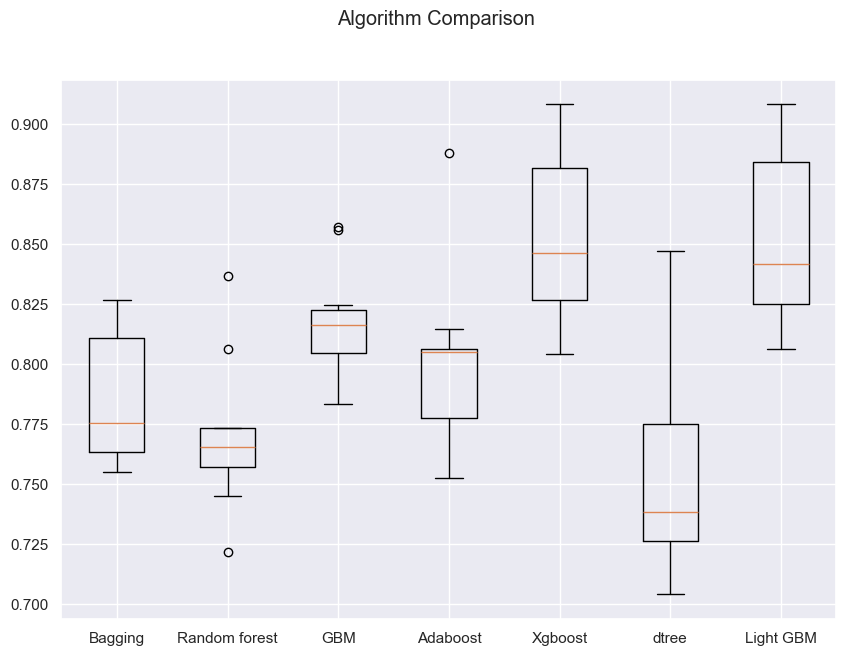

In [69]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(cv_results)
ax.set_xticklabels(model_names)

plt.show()

It appears Light GBM, XGBoost, GBM are the models with good potential. Ada Boost also looks good with the higher end outlier performance score

## Oversampling train data using SMOTE
Our dataset has a huge imbalance in target variable labels. To deal with such datasets, we have a few tricks up our sleeves, which we call Imbalanced Classification.

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on the minority class, although typically it is performance on the minority class that is most important, which is the case in our study here.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [70]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy="minority", k_neighbors=10, random_state=seed
)  # Synthetic Minority Over Sampling Technique

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 27)
After UpSampling, the shape of train_y: (10198,) 



# Build Models with Oversampled Data
## Build and Train Models
We are building and training the same 7 models as before. We are however going to use the over-sampled training data for training the models.

In [71]:
models_over = []

# Appending models into the list

models_over.append(("Bagging UpSampling", BaggingClassifier(random_state=seed)))
models_over.append(
    ("Random forest UpSampling", RandomForestClassifier(random_state=seed))
)
models_over.append(("GBM UpSampling", GradientBoostingClassifier(random_state=seed)))
models_over.append(("Adaboost UpSampling", AdaBoostClassifier(random_state=seed)))
models_over.append(
    ("Xgboost UpSampling", XGBClassifier(random_state=seed, eval_metric=loss_func))
)
models_over.append(("dtree UpSampling", DecisionTreeClassifier(random_state=seed)))
models_over.append(("Light GBM UpSampling", lgb.LGBMClassifier(random_state=seed, verbose=-1)))

for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10

    cv_result_over = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result_over)

    model.fit(X_train_over, y_train_over)
    model_score_over = get_metrics_score(
        model, X_train_over, X_val, y_train_over, y_val
    )
    add_score_model(name, model_score_over, cv_result_over.mean())

print("Operation Completed!")

Operation Completed!


## Comparing Models

In [72]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["Test_Recall", "Cross_Val_Score_Train"], ascending=False
).style.highlight_max(color="lightgreen", axis=0).highlight_min(color="pink", axis=0)

* The best 4 models with respect to validation recall and cross validation score, are as follows:
1. Light GBM trained with over/up-sampled data
2. GBM trained with over/up-sampled data
3. AdaBoost trained with over/up-sampled data
4. XGBoost trained with over/up-sampled data

## Undersampling train data using Random Under Sampler
Undersampling is another way of dealing with imbalance in the dataset.

Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset until a balanced dataset is created.

In [73]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [74]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 27)
After Under Sampling, the shape of train_y: (1952,) 



# Build Models with Undersampled Data
## Build and Train Models
We are again building the same 7 models as before and training with the undersampled dataset, and use the validation dataset to score the models.

In [75]:
models_under = []

# Appending models into the list

models_under.append(("Bagging DownSampling", BaggingClassifier(random_state=seed)))
models_under.append(("Random forest DownSampling", RandomForestClassifier(random_state=seed)))
models_under.append(("GBM DownSampling", GradientBoostingClassifier(random_state=seed)))
models_under.append(("Adaboost DownSampling", AdaBoostClassifier(random_state=seed)))
models_under.append(("Xgboost DownSampling", XGBClassifier(random_state=seed, eval_metric=loss_func)))
models_under.append(("dtree DownSampling", DecisionTreeClassifier(random_state=seed)))
models_under.append(("Light GBM DownSampling", lgb.LGBMClassifier(random_state=seed, verbose=-1)))

for name, model in models_under:
    scoring = "recall"
    kfold = StratifiedKFold( n_splits=10, shuffle=True, random_state=1  # Setting number of splits equal to 10

    cv_result_under = cross_val_score(estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold    )
    cv_results.append(cv_result_under)

    model.fit(X_train_un, y_train_un)
    model_score_under = get_metrics_score(model, X_train_un, X_val, y_train_un, y_val)
    add_score_model(name, model_score_under, cv_result_under.mean())

print("Operation Completed!")

Operation Completed!


## Comparing Models

In [76]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["Test_Recall", "Cross_Val_Score_Train"], ascending=False
).style.highlight_max(color="lightgreen", axis=0).highlight_min(color="pink", axis=0)

The 4 best models are:
1. XGBoost trained with undersampled data
2. AdaBoost trained with undersampled data
3. Light GBM trained with undersampled data
4. GBM trained with undersampled data  

We will now try to tune these 4 models using Random Search CV

# Choice of models for tuning
1. XGBoost with down-sampling has the best validation recall of 96.3%, along-with 95% cross validation score on train, and 0.99 AUC, which means is it has high possibility of performing very well in unseen dataset. There is a bit of over-fitting, which I expect to resolve by tuning.  

2. AdaBoost is generalizing the model very well, it is neither over-fitting, nor has any bias, AUC is 0.985 and cross validation score on train is 93%, recall on validation set is same as XGBoost (96.3%). I expect to improve the model (~94% on validation set) via tuning.  

3. Light GBM works really well in all aspects, but there is slight over-fitting problem, which I expect to resolve by tuning. Accuracy on validation is 94%, with cross validation score on train 95%, recall on validation ~96%, AUC is 0.99. This looks like a very promising model.  

4. GBM is not overfitting, and neither it is suffering from bias or variance. Recall on validation is ~96%, accuracy on validation ~94%, AUC is ~0.99, cross validation score on train is ~95%. This would be my top choice because none of the training scores are 100%, meaning it is not trying to explain every single aspect of training data by overfitting it.

## Model Tuning using RandomizedSearchCV
Typically a hyperparameter has a known effect on a model in the general sense, but it is not clear how to best set a hyperparameter for a given dataset. Further, many machine learning models have a range of hyperparameters and they may interact in nonlinear ways.

As such, it is often required to search for a set of hyperparameters that result in the best performance of a model on a dataset. This is called hyperparameter optimization, hyperparameter tuning, or hyperparameter search.

An optimization procedure involves defining a search space. This can be thought of geometrically as an n-dimensional volume, where each hyperparameter represents a different dimension and the scale of the dimension are the values that the hyperparameter may take on, such as real-valued, integer-valued, or categorical.

Search Space: Volume to be searched where each dimension represents a hyperparameter and each point represents one model configuration. A point in the search space is a vector with a specific value for each hyperparameter value. The goal of the optimization procedure is to find a vector that results in the best performance of the model after learning, such as maximum accuracy or minimum error.

A range of different optimization algorithms may be used, although two of the simplest and most common methods are random search and grid search.

Random Search: Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain.  

Grid Search: Define a search space as a grid of hyperparameter values and evaluate every position in the grid.

## Tuning XGBOOST with Down Sampled data
Finding best parameter for high recall using Random Search with cross validation

In [77]:
%%time

# defining model
model = XGBClassifier(random_state=seed, eval_metric=loss_func)


# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,500,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(4,20,1),
            'reg_lambda':[5,10, 15, 20]} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_,xgb_tuned.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 11, 'learning_rate': 0.01, 'gamma': 3} with CV score=1.0:
CPU times: total: 4.34 s
Wall time: 56.9 s


Building the model with the resulted best parameters

In [78]:
# building model with best parameters
xgb_tuned_model = XGBClassifier(
    n_estimators=150,
    scale_pos_weight=10,
    subsample=1,
    reg_lambda=20,
    max_depth=5,
    learning_rate=0.01,
    gamma=0,
    eval_metric=loss_func,
    random_state=seed,
)
# Fit the model on training data
xgb_tuned_model.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

# Get scores

In [79]:
xgb_tuned_model_score = get_metrics_score(
    xgb_tuned_model, X_train, X_val, y_train, y_val
)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
xgb_down_cv = cross_val_score(
    estimator=xgb_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "XGB Tuned with Down Sampling", xgb_tuned_model_score, xgb_down_cv.mean()
)

## Confusion matrix on validation

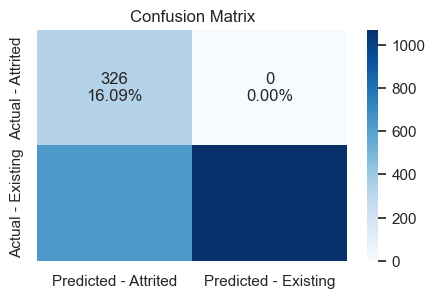

In [80]:
make_confusion_matrix(xgb_tuned_model, X_val, y_val)

# Tuning AdaBoost with Down Sampled data
Finding best parameter for high recall using Random Search with cross validation

In [81]:
%%time

# defining model
model = AdaBoostClassifier(random_state=seed)

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,2000,50),
            'learning_rate':[0.01,0.1,0.2,0.05]} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
ada_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
ada_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(ada_tuned.best_params_,ada_tuned.best_score_))

Best parameters are {'n_estimators': 1050, 'learning_rate': 0.1} with CV score=0.9405743740795287:
CPU times: total: 6.17 s
Wall time: 11min 50s


Building the model with the resulted best parameters

In [82]:
# building model with best parameters
ada_tuned_model = AdaBoostClassifier(n_estimators=1050, learning_rate=0.1, random_state=seed)
# Fit the model on training data
ada_tuned_model.fit(X_train_un, y_train_un)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1050, random_state=1)

Get scores

In [83]:
ada_tuned_model_score = get_metrics_score(ada_tuned_model, X_train, X_val, y_train, y_val)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
ada_down_cv = cross_val_score(estimator=ada_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)


add_score_model("AdaBoost Tuned with Down Sampling", ada_tuned_model_score, ada_down_cv.mean())

## Confusion matrix on validation

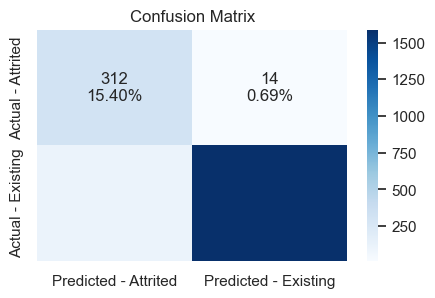

In [84]:
make_confusion_matrix(ada_tuned_model, X_val, y_val)

## Tuning Light GBM with Down-Sampled data
### Finding best parameter for high recall using Random Search with cross validation

In [85]:
%%time

# defining model
model = lgb.LGBMClassifier(random_state=seed, verbose=-1)

# Hyper parameters
min_gain_to_split = [0.01, 0.1, 0.2, 0.3]
min_data_in_leaf = [10, 20, 30, 40, 50]
feature_fraction = [0.8, 0.9, 1.0]
max_depth = [5, 8, 15, 25, 30]
extra_trees = [True, False]
learning_rate = [0.01,0.1,0.2,0.05]

# Parameter grid to pass in RandomizedSearchCV
param_grid={'min_gain_to_split': min_gain_to_split,
               'min_data_in_leaf': min_data_in_leaf,
               'feature_fraction': feature_fraction,
               'max_depth': max_depth,
               'extra_trees': extra_trees,
               'learning_rate': learning_rate,
               'boosting_type': ['gbdt'],
               'objective': ['binary'],
               'is_unbalance': [True],
               'metric': ['binary_logloss'],} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
lgbm_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
lgbm_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(lgbm_tuned.best_params_,lgbm_tuned.best_score_))

Best parameters are {'objective': 'binary', 'min_gain_to_split': 0.01, 'min_data_in_leaf': 50, 'metric': 'binary_logloss', 'max_depth': 8, 'learning_rate': 0.2, 'is_unbalance': True, 'feature_fraction': 0.8, 'extra_trees': False, 'boosting_type': 'gbdt'} with CV score=0.9559330948874394:
CPU times: total: 4.17 s
Wall time: 56 s


## Building the model with the resulted best parameters

In [86]:
# building model with best parameters
lgbm_tuned_model = lgb.LGBMClassifier(
               min_gain_to_split = 0.01,
               min_data_in_leaf = 50,
               feature_fraction = 0.8,
               max_depth = 8,
               extra_trees = False,
               learning_rate = 0.2,
               objective = 'binary',
               metric = 'binary_logloss',
               is_unbalance = True,
               boosting_type = 'gbdt',
               random_state = seed,
               verbose=-1
)
# Fit the model on training data
lgbm_tuned_model.fit(X_train_un, y_train_un)

LGBMClassifier(extra_trees=False, feature_fraction=0.8, is_unbalance=True,
               learning_rate=0.2, max_depth=8, metric='binary_logloss',
               min_data_in_leaf=50, min_gain_to_split=0.01, objective='binary',
               random_state=1, verbose=-1)

## Get scores

In [87]:
lgbm_tuned_model_score = get_metrics_score(
    lgbm_tuned_model, X_train, X_val, y_train, y_val
)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
lgb_down_cv = cross_val_score(
    estimator=lgbm_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "Light GBM Tuned with Down Sampling", lgbm_tuned_model_score, lgb_down_cv.mean()
)

## Confusion matrix on validation

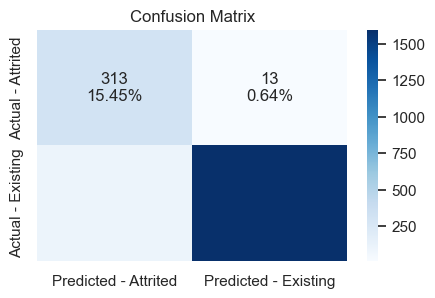

In [88]:
make_confusion_matrix(lgbm_tuned_model, X_val, y_val)

## Tuning GBM with Down Sampled data
### Finding best parameter for high recall using Random Search with cross validation

In [89]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=seed)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 15] 


# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbm_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gbm_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(gbm_tuned.best_params_,gbm_tuned.best_score_))

Best parameters are {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 'auto', 'max_depth': 25} with CV score=0.9590258783925941:
CPU times: total: 9.3 s
Wall time: 16min


## Building the model with the resulted best parameters

In [90]:
# building model with best parameters
gbm_tuned_model = GradientBoostingClassifier(
    n_estimators=700,
    max_features="auto",
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=15,
    random_state=seed,
)
# Fit the model on training data
gbm_tuned_model.fit(X_train_un, y_train_un)

GradientBoostingClassifier(max_depth=25, max_features='auto',
                           min_samples_leaf=15, n_estimators=700,
                           random_state=1)

## Get scores

In [91]:
gbm_tuned_model_score = get_metrics_score(gbm_tuned_model, X_train, X_val, y_train, y_val)


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
gbm_down_cv = cross_val_score(estimator=gbm_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)


add_score_model("GBM Tuned with Down Sampling", gbm_tuned_model_score, gbm_down_cv.mean())

## Confusion matrix on validation

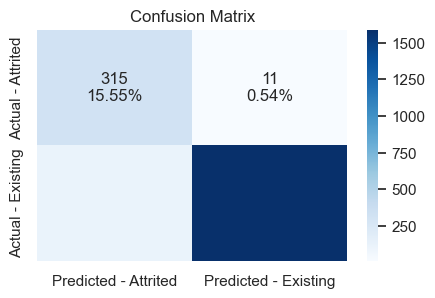

In [92]:
make_confusion_matrix(gbm_tuned_model, X_val, y_val)

## Comparing Models

In [93]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)


for col in comparison_frame.select_dtypes(include="float64").columns.tolist():
    comparison_frame[col] = round(comparison_frame[col] * 100, 0).astype(int)


comparison_frame.tail(4).sort_values(
    by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False
)

Model  Cross_Val_Score_Train  Train_Accuracy  \
21        XGB Tuned with Down Sampling                    100              68   
23  Light GBM Tuned with Down Sampling                     96              96   
24        GBM Tuned with Down Sampling                     95              95   
22   AdaBoost Tuned with Down Sampling                     94              94   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
21             69           100          100               33              34   
23             94           100           96               78              75   
24             94           100           97               77              74   
22             94            96           96               73              74   

    Train_F1  Test_F1  Train_ROC_AUC  Test_ROC_AUC  
21        50       51             97            97  
23        88       84            100            99  
24        87       84            100            99  
22        83       83             99            99

# Final Model Selection
1. The XGBoost model with hyper parameter tuning and trained with undersampled dataset, has best recall on validation set of ~99%, but accuracy is lower than the human level accuracy (i,e, classifying everyone as non-attriting customers). Thus, we are not selecting this model as the final model
 
2. The validation recall of ~97% is provided by the GBM with hyper parameter tuning trained with undersampled dataset, has validation accuracy of ~94%, and precision of ~74%, Validation AUC ~99%, Cross Validation Mean of 96%. Also, the model is neither suffering from bias, nor variance. We are selecting GBM Tuned with Down Sampling model as our final model

# Check Test Data on GBM Tuned and Trained with Downsampled Data
## Feature Importance

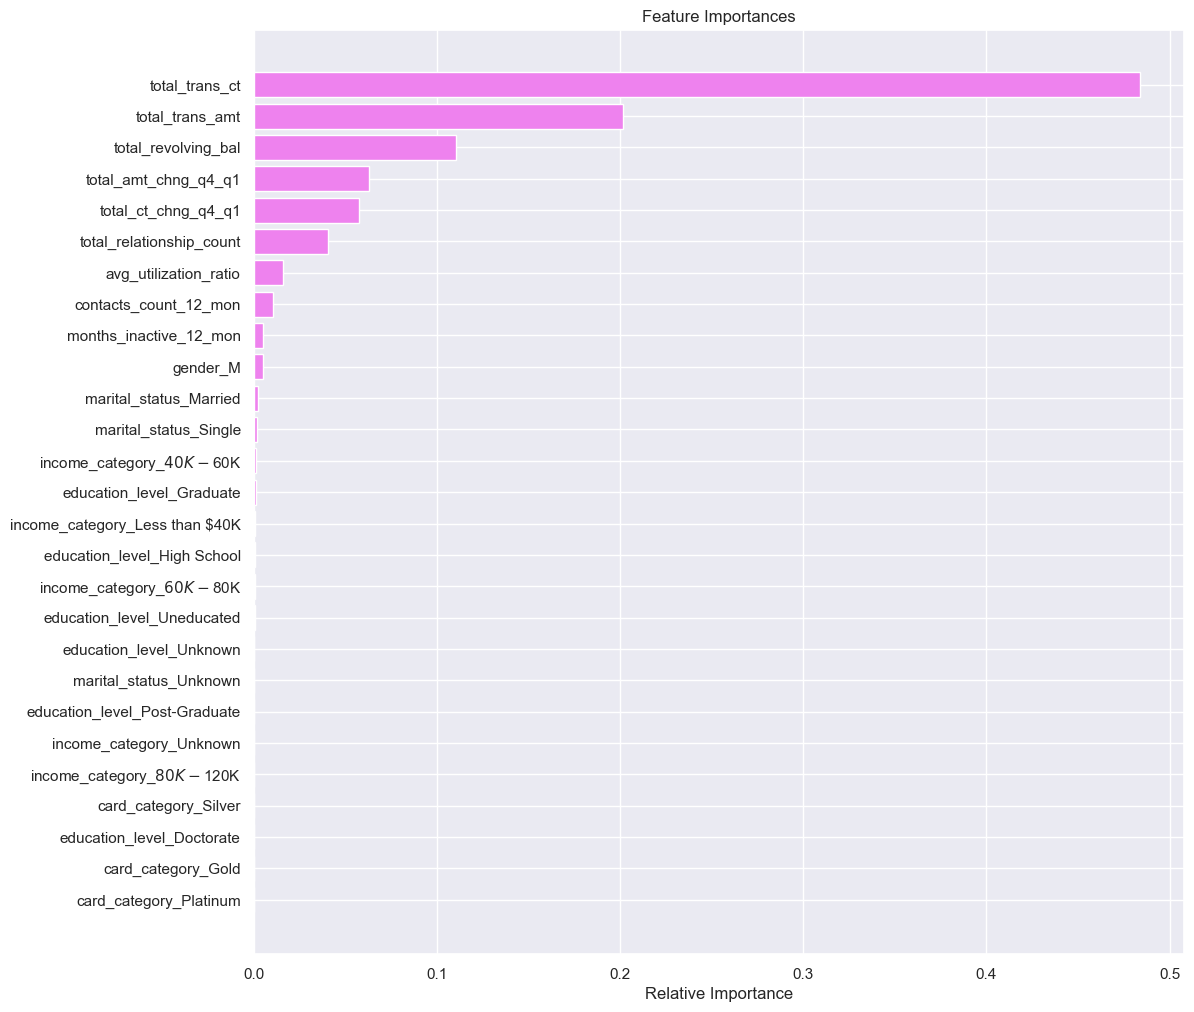

In [94]:
feature_names = X_train.columns
importances = gbm_tuned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Test scores
Let's check the performance of the model on Test (unseen) dataset.

In [95]:
gbm_tuned_model_test_score = get_metrics_score(
    gbm_tuned_model, X_train, X_test, y_train, y_test
)

final_model_names = ["gbm Tuned Down-sampled Trained"]
final_acc_train = [gbm_tuned_model_test_score[0]]
final_acc_test = [gbm_tuned_model_test_score[1]]
final_recall_train = [gbm_tuned_model_test_score[2]]
final_recall_test = [gbm_tuned_model_test_score[3]]
final_precision_train = [gbm_tuned_model_test_score[4]]
final_precision_test = [gbm_tuned_model_test_score[5]]
final_f1_train = [gbm_tuned_model_test_score[6]]
final_f1_test = [gbm_tuned_model_test_score[7]]
final_roc_auc_train = [gbm_tuned_model_test_score[8]]
final_roc_auc_test = [gbm_tuned_model_test_score[9]]

final_result_score = pd.DataFrame(
    {
        "Model": final_model_names,
        "Train_Accuracy": final_acc_train,
        "Test_Accuracy": final_acc_test,
        "Train_Recall": final_recall_train,
        "Test_Recall": final_recall_test,
        "Train_Precision": final_precision_train,
        "Test_Precision": final_precision_test,
        "Train_F1": final_f1_train,
        "Test_F1": final_f1_test,
        "Train_ROC_AUC": final_roc_auc_train,
        "Test_ROC_AUC": final_roc_auc_test,
    }
)


for col in final_result_score.select_dtypes(include="float64").columns.tolist():
    final_result_score[col] = final_result_score[col] * 100


final_result_score

Model  Train_Accuracy  Test_Accuracy  \
0  gbm Tuned Down-sampled Trained          95.144         93.238   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1  \
0       100.000       96.000           76.790          71.560    86.871   

   Test_F1  Train_ROC_AUC  Test_ROC_AUC  
0   81.997         99.819        99.098

The performance of the model with the test data is almost similar to the performance on the validation dataset.
## Confusion Matrix

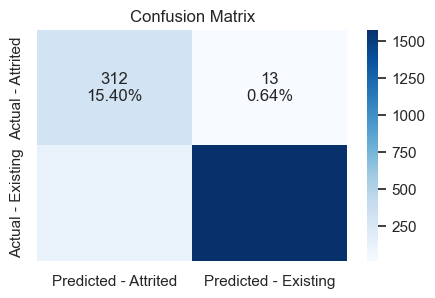

In [96]:
make_confusion_matrix(gbm_tuned_model, X_test, y_test)

## Cumulative Lift/Gain Chart
Cumulative lift/gain chart is important to understand how a model would perform in production system with unseen data

In [97]:
import scikitplot as skplt
import matplotlib.pyplot as plt

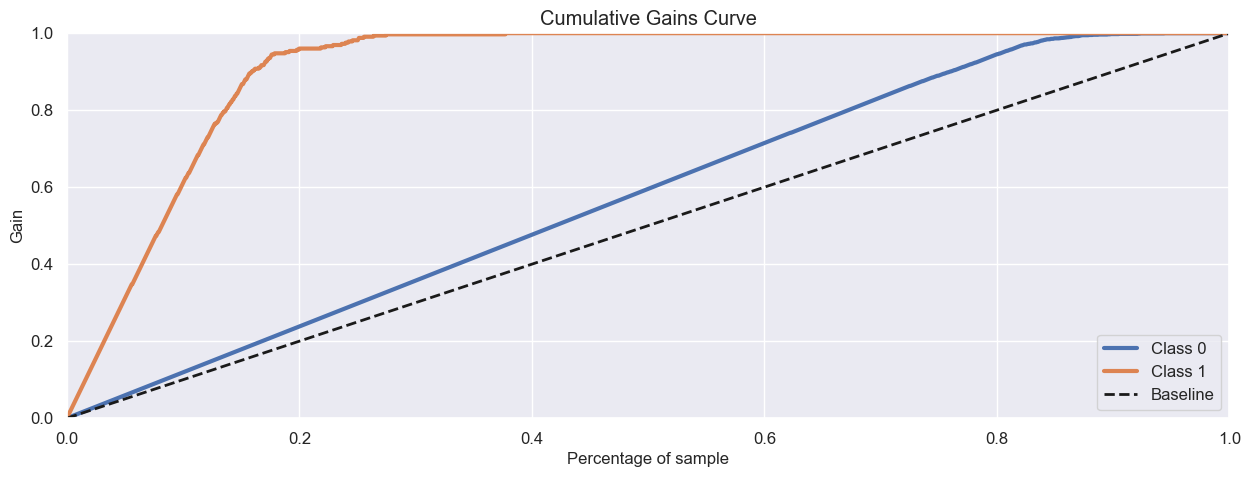

In [98]:
y_pred_prob = gbm_tuned_model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_pred_prob, figsize=(15, 5))
plt.show()

The above chart shows, if we sort the customers in the descending order of the probability of attrition (class 1), and target the top ~30% of the population, we are most likely to find 100% of the people who would actually attrite.

# ROC-AUC Curve
ROC AUC characteristic is important to understand how good the model is.

If the model is really good in identifying the classes, the Area Under Curve is really high, close to 1.

If the model can not distinguish the classes well, the Area Under Curve is really low, close to 0.5.

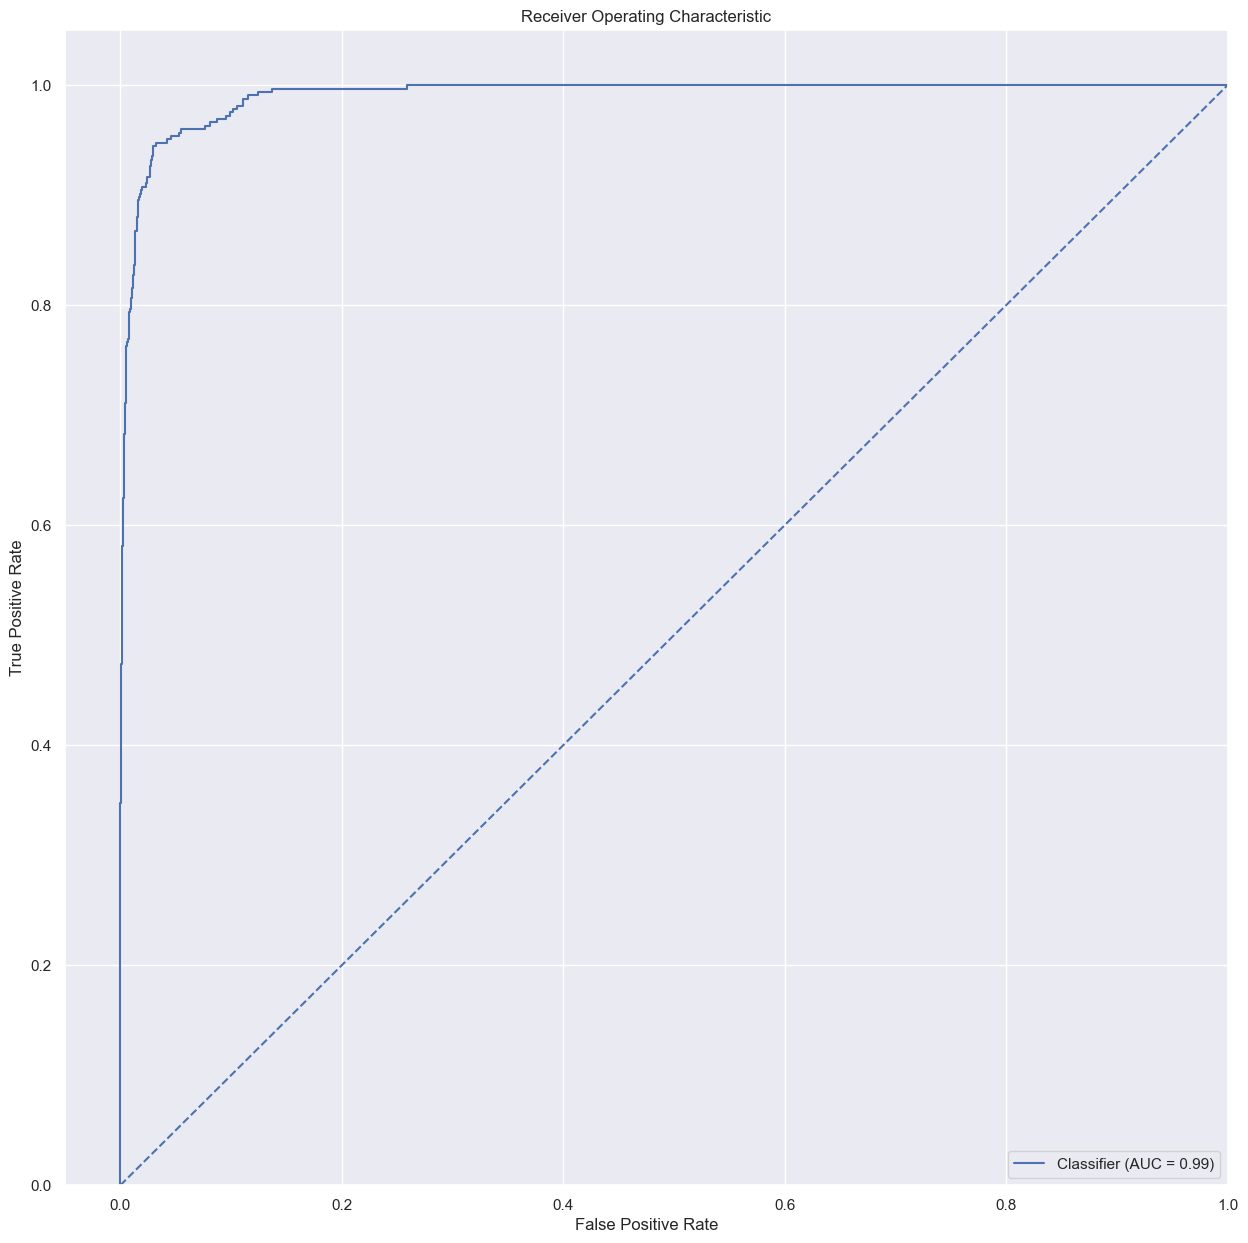

In [99]:
# roc_curve(gbm_tuned_model, X_test, y_test)
# plt.title("Receiver Operating Characteristic")
# plt.legend(loc="lower right")
# plt.plot([0, 1], [0, 1], "b--")
# plt.xlim([-0.05, 1])
# plt.ylim([0, 1.05])
# plt.ylabel("True Positive Rate")
# plt.xlabel("False Positive Rate")
# plt.show()

y_score = gbm_tuned_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Generate the ROC Curve
roc_display = RocCurveDisplay.from_predictions(y_test, y_score)
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "b--")  # Adding the diagonal line
plt.xlim([-0.05, 1])
plt.ylim([0, 1.05])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Our model appears to be really good, since the AUC is almost 1.

# Productionizing the model
Now that we have finalized our model, we'll build a model pipeline to streamline all the steps of model building. We'll start will the initial dataset and proceed with the pipeline building steps.

Machine Learning (ML) pipeline, theoretically, represents different steps including data transformation and prediction through which data passes. The outcome of the pipeline is the trained model which can be used for making the predictions. Sklearn.pipeline is a Python implementation of ML pipeline. Instead of going through the model fitting and data transformation steps for the training and test datasets separately, we can use Sklearn.pipeline to automate these steps. Here is the diagram representing the pipeline for training our machine learning model based on supervised learning, and then using test data to predict the labels.

### Set Static variables

In [100]:
# The static variables
# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

df_pipe = churner.copy()
cat_columns = df_pipe.select_dtypes(include="object").columns.tolist()
df_pipe[cat_columns] = df_pipe[cat_columns].astype("category")

In [101]:
# Dependent and independent variables
X = df_pipe.drop(columns=["Attrition_Flag"])
y = df_pipe["Attrition_Flag"].map(target_mapper)

In [102]:
# Split data in Train, Validation and Test sets
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 20) (2026, 20) (2026, 20)


In [103]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
Attrition_Flag
0   0.840
1   0.160
Name: proportion, dtype: float64


### Undersampling the training data since that generalized this model really well

In [104]:
under_sample = RandomUnderSampler(random_state=seed)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

### Data processing Steps

In [105]:
# For dropping columns
columns_to_drop = [
    "clientnum",
    "credit_limit",
    "dependent_count",
    "months_on_book",
    "avg_open_to_buy",
    "customer_age",
]

# For masking a particular value in a feature
column_to_mask_value = "income_category"
value_to_mask = "abc"
masked_value = "Unknown"

# One-hot encoding columns
columns_to_encode = [
    "gender",
    "education_level",
    "marital_status",
    "income_category",
    "card_category",
]

# Numerical Columns
num_columns = [
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
    "total_revolving_bal",
    "total_amt_chng_q4_q1",
    "total_trans_amt",
    "total_trans_ct",
    "total_ct_chng_q4_q1",
    "avg_utilization_ratio",
]

# Columns for null imputation with Unknown
columns_to_null_imp_unknown = ["education_level", "marital_status"]

## Build the pipeline

In [106]:
# To Standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

# To Drop unnecessary columns
column_dropper = ColumnDropper(features=columns_to_drop)

# To Mask incorrect/meaningless value of a feature
value_masker = CustomValueMasker(
    feature=column_to_mask_value, value_to_mask=value_to_mask, masked_value=masked_value
)

# Missing value imputation
imputer = FillUnknown()

# To encode the categorical data
one_hot = OneHotEncoder(handle_unknown="ignore")

# To scale numerical columns
scaler = RobustScaler()


# creating a transformer for feature name standardization and dropping columns
cleanser = Pipeline(
    steps=[
        ("feature_name_standardizer", feature_name_standardizer),
        ("column_dropper", column_dropper),
        ("value_mask", value_masker),
        ("imputation", imputer),
    ]
)

# creating a transformer for data encoding

encode_transformer = Pipeline(steps=[("onehot", one_hot)])
num_scaler = Pipeline(steps=[("scale", scaler)])

preprocessor = ColumnTransformer(
    transformers=[
        ("encoding", encode_transformer, columns_to_encode),
        ("scaling", num_scaler, num_columns),
    ],
    remainder="passthrough",
)

# Model

gbm_tuned_model = GradientBoostingClassifier(
    n_estimators=700,
    max_features="auto",
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=15,
    random_state=seed,
)

# Creating new pipeline with best parameters
model_pipe = Pipeline(
    steps=[
        ("cleanse", cleanser),
        ("preprocess", preprocessor),
        ("model", gbm_tuned_model),
    ]
)
# Fit the model on training data
model_pipe.fit(X_train_un, y_train_un)

Pipeline(steps=[('cleanse',
                 Pipeline(steps=[('feature_name_standardizer',
                                  <__main__.FeatureNamesStandardizer object at 0x000001AE78283A50>),
                                 ('column_dropper',
                                  <__main__.ColumnDropper object at 0x000001AE78EFDDD0>),
                                 ('value_mask',
                                  <__main__.CustomValueMasker object at 0x000001AE78FB1E10>),
                                 ('imputation',
                                  <__main__.FillUnknown object at 0x000001AE78ED7BD0>)])),
                ('prepro...
                                                                   RobustScaler())]),
                                                  ['total_relationship_count',
                                                   'months_inactive_12_mon',
                                                   'contacts_count_12_mon',
                                                   'total_revolving_bal',
                                                   'total_amt_chng_q4_q1',
                                                   'total_trans_amt',
                                                   'total_trans_ct',
                                                   'total_ct_chng_q4_q1',
                                                   'avg_utilization_ratio'])])),
                ('model',
                 GradientBoostingClassifier(max_depth=25, max_features='auto',
                                            min_samples_leaf=15,
                                            n_estimators=700,
                                            random_state=1))])

## Score the pipeline using test data
### Accuracy

In [107]:
print("Accuracy on Test is: {}%".format(round(model_pipe.score(X_test, y_test) * 100, 0)))

Accuracy on Test is: 94.0%


### Recall

In [108]:
pred_train_p = model_pipe.predict_proba(X_train_un)[:, 1] > 0.5
pred_test_p = model_pipe.predict_proba(X_test)[:, 1] > 0.5

pred_train_p = np.round(pred_train_p)
pred_test_p = np.round(pred_test_p)

train_acc_p = accuracy_score(pred_train_p, y_train_un)
test_acc_p = accuracy_score(pred_test_p, y_test)

train_recall_p = recall_score(y_train_un, pred_train_p)
test_recall_p = recall_score(y_test, pred_test_p)

In [109]:
print("Recall on Test is: {}%".format(round(test_recall_p * 100, 0)))

Recall on Test is: 96.0%


# Actionable Insights and Recommendations

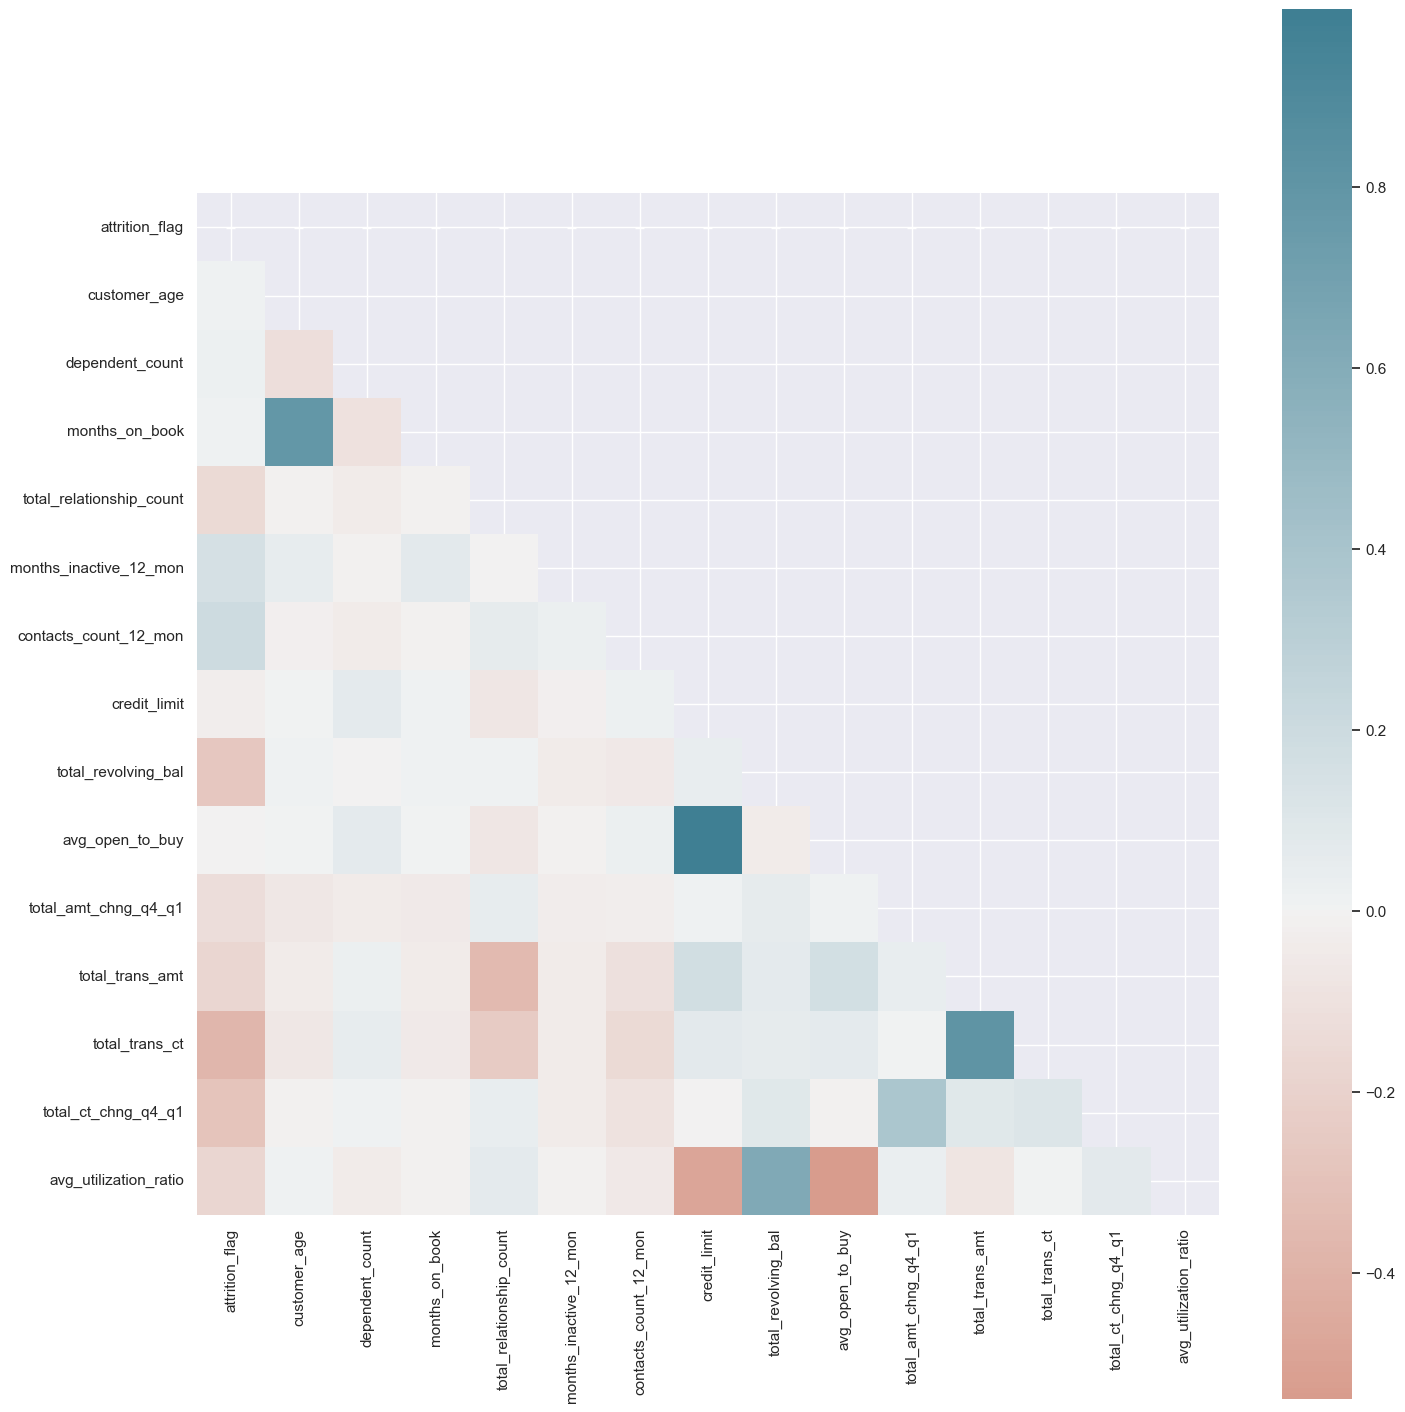

In [127]:
mask = np.zeros_like(data_clean.corr(numeric_only=True), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True


sns.set(rc={"figure.figsize": (15, 15)})

sns.heatmap(
    data_clean.corr(numeric_only=True),
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200, as_cmap=True),
    square=True,
    fmt=".2f",
    mask=mask,
    center=0,
)
plt.tight_layout()
plt.show()

In [112]:
elapsed_time = time.time() - start_time
print(f"Total execution time: {elapsed_time} seconds")

Total execution time: 4205.842528820038 seconds


#### * The most important features to understand customer credit card churn, are
#### 1. Total Transaction Count
#### 2. Total Transaction Amount
#### 3. Total Revolving Balance
#### 4. Total Amount Change Q4 to Q1
#### 5. Total Count Change Q4 to Q1
#### 6. Total Relationship Count  
#### * All of these features are negatively correlated with the Attrition Flag, meaning, the lower the values of these features, the higher the chances of a customer to attrite   
#### * Bank should connect with the customer more often to increase the connect, and provide the customer with various offers and schemes to increase relationships of the customer with the bank   
#### * Bank should offer cashback schemes on credit cards, which might encourage the customers on using the credit card more often   
#### * Bank should also offer credit limit increase for the customers who are regularly using the credit card. This should increase the credit card spends/transaction amounts.   
#### * 0% interest EMI on credit card is also another offer that can be provided to customers to encourage the customers buy products of higher cost with credit card, and convert the expenditure to EMI, so that total transaction amount as well as transaction counts would increase. The balance would also revolve nicely.   
#### * Along with the available types of cards, bank can introduce credit cards specific to online shopping (with % cashback offers) or online food ordering. This way the card will be used more frequently.   
#### * With our model, we can predict which customers are likely to attrite, and according to the predicted probability, at least top 20-30% customers can be reached out to discuss credit card offers, credit limit increase etc, to try retain those customers.